<a href="https://colab.research.google.com/github/khansarae/tugas-datmin-/blob/main/Capstone_Project_01_Kelompok_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama Anggota Kelompok:


1.   Nabila Khansa Raefa (11230940000020)
2.   Anisa Aulia Nurjanah (11230940000021)
3.   Azahra Aulia Jenar (11230940000036)
4.   Syahrul Mauhub Yasser (11230940000054)



#Kasus:

- Anda adalah seorang Data Analyst yang bekerja di PT Ray Pink Property Indonesia (RPPI).

- RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
- RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
- Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
- Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
- Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
- Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
- Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

##Petunjuk:

 Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi over lunch dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

In [ ]:
# Import Library
import os, re, math, textwrap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")

dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

--2025-09-30 23:00:39--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.01s   

2025-09-30 23:00:39 (4.25 MB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2025-09-30 23:00:39--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.


((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

#Informasi Data

### Data Jakarta

In [ ]:
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

In [ ]:
dfJ.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfJ.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Depok

In [ ]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   119 non-null    object 
 1   LT           120 non-null    object 
 2   LB           118 non-null    float64
 3   KT           118 non-null    float64
 4   KM           118 non-null    float64
 5   garasi       25 non-null     float64
 6   carport      94 non-null     float64
 7   lokasi       118 non-null    object 
 8   sertifikat   118 non-null    object 
 9   listrik      103 non-null    float64
 10  hadap        62 non-null     object 
 11  harga        118 non-null    float64
 12  URL          118 non-null    object 
 13  deskripsi    118 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
dfD.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfD.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Bogor

In [ ]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   193 non-null    object 
 1   LT           193 non-null    float64
 2   LB           193 non-null    float64
 3   KT           193 non-null    float64
 4   KM           193 non-null    float64
 5   garasi       193 non-null    float64
 6   carport      193 non-null    float64
 7   lokasi       193 non-null    object 
 8   sertifikat   193 non-null    object 
 9   listrik      193 non-null    float64
 10  hadap        19 non-null     object 
 11  harga        193 non-null    float64
 12  URL          193 non-null    object 
 13  deskripsi    193 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
dfB.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfB.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Tangerang

In [ ]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   124 non-null    object 
 1   LT           124 non-null    float64
 2   LB           124 non-null    float64
 3   KT           124 non-null    float64
 4   KM           124 non-null    float64
 5   garasi       38 non-null     float64
 6   carport      92 non-null     float64
 7   lokasi       124 non-null    object 
 8   sertifikat   122 non-null    object 
 9   listrik      111 non-null    float64
 10  hadap        49 non-null     object 
 11  harga        124 non-null    float64
 12  URL          124 non-null    object 
 13  deskripsi    124 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
dfT.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfT.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Bekasi

In [ ]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   107 non-null    object 
 1   LT           107 non-null    float64
 2   LB           107 non-null    float64
 3   KT           107 non-null    float64
 4   KM           106 non-null    float64
 5   garasi       33 non-null     float64
 6   carport      81 non-null     float64
 7   lokasi       107 non-null    object 
 8   sertifikat   106 non-null    object 
 9   listrik      101 non-null    float64
 10  hadap        48 non-null     object 
 11  harga        107 non-null    float64
 12  URL          107 non-null    object 
 13  deskripsi    107 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
dfX.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfX.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Menghapus Variabel yang tidak diperlukan

### Data Jakarta

In [ ]:
#Mengecek kembali info dari data
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

In [ ]:
# Menghapus Variabel yang tidak ada keterangan yang jelas
dfJ2 = dfJ.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
                'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
                'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
                'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
               axis=1)

In [ ]:
# Mengecek kembali data yang telah dihilangkan variabelnya
dfJ2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  121 non-null    object 
 1   LT          121 non-null    float64
 2   LB          121 non-null    float64
 3   KT          121 non-null    float64
 4   KM          121 non-null    float64
 5   garasi      44 non-null     float64
 6   carport     90 non-null     float64
 7   lokasi      121 non-null    object 
 8   sertifikat  119 non-null    object 
 9   listrik     120 non-null    float64
 10  hadap       36 non-null     object 
 11  harga       121 non-null    float64
 12  URL         121 non-null    object 
 13  deskripsi   112 non-null    object 
dtypes: float64(8), object(6)
memory usage: 112.1+ KB


In [ ]:
dfJ2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Depok

In [ ]:
#Mengecek kembali info dari data
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   119 non-null    object 
 1   LT           120 non-null    object 
 2   LB           118 non-null    float64
 3   KT           118 non-null    float64
 4   KM           118 non-null    float64
 5   garasi       25 non-null     float64
 6   carport      94 non-null     float64
 7   lokasi       118 non-null    object 
 8   sertifikat   118 non-null    object 
 9   listrik      103 non-null    float64
 10  hadap        62 non-null     object 
 11  harga        118 non-null    float64
 12  URL          118 non-null    object 
 13  deskripsi    118 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
# Menghapus Variabel yang tidak ada keterangan yang jelas
dfD2 = dfD.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
                'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
                'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
                'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
               axis=1)

In [ ]:
# Mengecek kembali data yang telah dihilangkan variabelnya
dfD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  119 non-null    object 
 1   LT          120 non-null    object 
 2   LB          118 non-null    float64
 3   KT          118 non-null    float64
 4   KM          118 non-null    float64
 5   garasi      25 non-null     float64
 6   carport     94 non-null     float64
 7   lokasi      118 non-null    object 
 8   sertifikat  118 non-null    object 
 9   listrik     103 non-null    float64
 10  hadap       62 non-null     object 
 11  harga       118 non-null    float64
 12  URL         118 non-null    object 
 13  deskripsi   118 non-null    object 
dtypes: float64(7), object(7)
memory usage: 109.3+ KB


### Data Bogor

In [ ]:
# Mengecek kembali info dari data
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   193 non-null    object 
 1   LT           193 non-null    float64
 2   LB           193 non-null    float64
 3   KT           193 non-null    float64
 4   KM           193 non-null    float64
 5   garasi       193 non-null    float64
 6   carport      193 non-null    float64
 7   lokasi       193 non-null    object 
 8   sertifikat   193 non-null    object 
 9   listrik      193 non-null    float64
 10  hadap        19 non-null     object 
 11  harga        193 non-null    float64
 12  URL          193 non-null    object 
 13  deskripsi    193 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
# Menghapus Variabel yang tidak ada keterangan yang jelas
dfB2 = dfB.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
                'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
                'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
                'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
               axis=1)

In [ ]:
# Mengecek kembali data yang telah dihilangkan variabelnya
dfB2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  193 non-null    object 
 1   LT          193 non-null    float64
 2   LB          193 non-null    float64
 3   KT          193 non-null    float64
 4   KM          193 non-null    float64
 5   garasi      193 non-null    float64
 6   carport     193 non-null    float64
 7   lokasi      193 non-null    object 
 8   sertifikat  193 non-null    object 
 9   listrik     193 non-null    float64
 10  hadap       19 non-null     object 
 11  harga       193 non-null    float64
 12  URL         193 non-null    object 
 13  deskripsi   193 non-null    object 
dtypes: float64(8), object(6)
memory usage: 109.4+ KB


### Data Tangerang

In [ ]:
#Mengecek kembali info dari data
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   124 non-null    object 
 1   LT           124 non-null    float64
 2   LB           124 non-null    float64
 3   KT           124 non-null    float64
 4   KM           124 non-null    float64
 5   garasi       38 non-null     float64
 6   carport      92 non-null     float64
 7   lokasi       124 non-null    object 
 8   sertifikat   122 non-null    object 
 9   listrik      111 non-null    float64
 10  hadap        49 non-null     object 
 11  harga        124 non-null    float64
 12  URL          124 non-null    object 
 13  deskripsi    124 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
# Menghapus Variabel yang tidak ada keterangan yang jelas
dfT2 = dfT.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
                'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
                'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
                'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
               axis=1)

In [ ]:
# Mengecek kembali data yang telah dihilangkan variabelnya
dfT2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  124 non-null    object 
 1   LT          124 non-null    float64
 2   LB          124 non-null    float64
 3   KT          124 non-null    float64
 4   KM          124 non-null    float64
 5   garasi      38 non-null     float64
 6   carport     92 non-null     float64
 7   lokasi      124 non-null    object 
 8   sertifikat  122 non-null    object 
 9   listrik     111 non-null    float64
 10  hadap       49 non-null     object 
 11  harga       124 non-null    float64
 12  URL         124 non-null    object 
 13  deskripsi   124 non-null    object 
dtypes: float64(8), object(6)
memory usage: 14.1+ KB


In [ ]:
dfT2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Bekasi

In [ ]:
#Mengecek kembali info dari data
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   107 non-null    object 
 1   LT           107 non-null    float64
 2   LB           107 non-null    float64
 3   KT           107 non-null    float64
 4   KM           106 non-null    float64
 5   garasi       33 non-null     float64
 6   carport      81 non-null     float64
 7   lokasi       107 non-null    object 
 8   sertifikat   106 non-null    object 
 9   listrik      101 non-null    float64
 10  hadap        48 non-null     object 
 11  harga        107 non-null    float64
 12  URL          107 non-null    object 
 13  deskripsi    107 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
# Menghapus Variabel yang tidak ada keterangan yang jelas
dfX2 = dfX.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
                'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
                'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
                'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
               axis=1)

In [ ]:
# Mengecek kembali data yang telah dihilangkan variabelnya
dfX2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  107 non-null    object 
 1   LT          107 non-null    float64
 2   LB          107 non-null    float64
 3   KT          107 non-null    float64
 4   KM          106 non-null    float64
 5   garasi      33 non-null     float64
 6   carport     81 non-null     float64
 7   lokasi      107 non-null    object 
 8   sertifikat  106 non-null    object 
 9   listrik     101 non-null    float64
 10  hadap       48 non-null     object 
 11  harga       107 non-null    float64
 12  URL         107 non-null    object 
 13  deskripsi   107 non-null    object 
dtypes: float64(8), object(6)
memory usage: 108.6+ KB


In [ ]:
dfX2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Mengecek Duplikasi Data

### Data Jakarta

In [ ]:
dfJ2.duplicated().sum()

np.int64(902)

In [ ]:
# Mengecek bagian data yang terduplikasi
dfJ2[dfJ2.duplicated()]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus baris yang memiliki data duplikat
dfJ2.drop_duplicates(inplace=True)

# Mengecek kembali duplikasi data
print(dfJ2.duplicated().sum())

# Mengecek ukuran data setelah tidak ada duplikasi data
print(dfJ2.shape)

0
(122, 14)


### Data Depok

In [ ]:
dfD2.duplicated().sum()

np.int64(877)

In [ ]:
# Mengecek bagian data yang terduplikasi
dfD2[dfD2.duplicated()]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus baris yang memiliki data duplikat
dfD2.drop_duplicates(inplace=True)

# Mengecek kembali duplikasi data
print(dfD2.duplicated().sum())

# Mengecek ukuran data setelah tidak ada duplikasi data
print(dfD2.shape)

0
(121, 14)


### Data Bogor

In [ ]:
dfB2.duplicated().sum()

np.int64(805)

In [ ]:
# Mengecek bagian data yang terduplikasi
dfB2[dfB2.duplicated()]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus baris yang memiliki data duplikat
dfB2.drop_duplicates(inplace=True)

# Mengecek kembali duplikasi data
print(dfB2.duplicated().sum())

# Mengecek ukuran data setelah tidak ada duplikasi data
print(dfB2.shape)

0
(194, 14)


### Data Tangerang

In [ ]:
dfT2.duplicated().sum()

np.int64(3)

In [ ]:
# Mengecek bagian data yang terduplikasi
dfT2[dfT2.duplicated()]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus baris yang memiliki data duplikat
dfT2.drop_duplicates(inplace=True)

# Mengecek kembali duplikasi data
print(dfT2.duplicated().sum())

# Mengecek ukuran data setelah tidak ada duplikasi data
print(dfT2.shape)

0
(125, 14)


### Data Bekasi

In [ ]:
dfX2.duplicated().sum()

np.int64(884)

In [ ]:
# Mengecek bagian data yang terduplikasi
dfX2[dfX2.duplicated()]

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus baris yang memiliki data duplikat
dfX2.drop_duplicates(inplace=True)

# Mengecek kembali duplikasi data
print(dfX2.duplicated().sum())

# Mengecek ukuran data setelah tidak ada duplikasi data
print(dfX2.shape)

0
(108, 14)


## Mengecek data untuk menentukan langkah imputasi

### Data Jakarta

In [ ]:
dfJ2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  121 non-null    object 
 1   LT          121 non-null    float64
 2   LB          121 non-null    float64
 3   KT          121 non-null    float64
 4   KM          121 non-null    float64
 5   garasi      44 non-null     float64
 6   carport     90 non-null     float64
 7   lokasi      121 non-null    object 
 8   sertifikat  119 non-null    object 
 9   listrik     120 non-null    float64
 10  hadap       36 non-null     object 
 11  harga       121 non-null    float64
 12  URL         121 non-null    object 
 13  deskripsi   112 non-null    object 
dtypes: float64(8), object(6)
memory usage: 14.3+ KB


In [ ]:
# Mengecek Skewness Untuk menentukan imputasi
print("Skewness Harga:", dfJ2['harga'].skew())
print("Luas Tanah:", dfJ2['LT'].skew())
print("Luas Bangunan:", dfJ2['LB'].skew())

Skewness Harga: 3.3157778765071426
Luas Tanah: 5.747640722877015
Luas Bangunan: 2.929375057315477


### Data Depok

In [ ]:
dfD2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  119 non-null    object 
 1   LT          120 non-null    object 
 2   LB          118 non-null    float64
 3   KT          118 non-null    float64
 4   KM          118 non-null    float64
 5   garasi      25 non-null     float64
 6   carport     94 non-null     float64
 7   lokasi      118 non-null    object 
 8   sertifikat  118 non-null    object 
 9   listrik     103 non-null    float64
 10  hadap       62 non-null     object 
 11  harga       118 non-null    float64
 12  URL         118 non-null    object 
 13  deskripsi   118 non-null    object 
dtypes: float64(7), object(7)
memory usage: 14.2+ KB


In [ ]:
print(dfD2['LT'].unique())
print(dfD2['LB'].unique())

['165' '50' '72' '40' '45' '36' '87' '210' '60' '70' '200' '57' '100' '97'
 '112' '84' '75' '487' '378' '400' '77' '1024' '120' '151' '885' '54'
 '249' '76' '66' '79' '78' '105' '63' '62' '71' '92' '96' '65' '104' '110'
 '64' '51' '85' '81' '59' '88' '47' '55' '82' '185' '880' '74' '335' '83'
 '94' '80' nan '- lokasi yang kami gunakan hanya per kecamatan'
 '-harga yang kami gunakan adalah per satuan juta']
[200.  45.  36.  30. 115.  60.  72.  48. 250.  50. 150.  40.  66. 109.
  73.  54. 450. 289. 226. 130. 400. 103. 180. 600.  47.  80. 260. 105.
 160.  70.  68.  75. 100.  77.  51.  61. 110.  58. 120.  55.  62.  42.
  46.  71.  63. 140. 300.  56.  15.  nan]


In [ ]:
dfD2['LT'] = pd.to_numeric(dfD2['LT'], errors='coerce')
dfD2['LB'] = pd.to_numeric(dfD2['LB'], errors='coerce')

In [ ]:
# Mengecek Skewness Untuk menentukan imputasi
print("Skewness Harga:", dfD2['harga'].skew())
print("Luas Tanah:", dfD2['LT'].skew())
print("Luas Bangunan:", dfD2['LB'].skew())

Skewness Harga: 3.2323665219843436
Luas Tanah: 4.232187477652301
Luas Bangunan: 3.136185779577435


In [ ]:
dfD2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,165.0,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,50.0,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,50.0,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50.0,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72.0,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,4-12-2021,50.0,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,4-12-2021,100.0,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1750.0,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NOTE:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Mengganti satuan Harga
dfD2['harga'] = dfD2['harga'] * 1000000
dfD2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,165.0,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2.100000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,50.0,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,50.0,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,2.500000e+08,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50.0,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72.0,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,3.500000e+08,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,4-12-2021,50.0,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,1.850000e+08,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,4-12-2021,100.0,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1.750000e+09,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NOTE:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Bogor

In [ ]:
dfB2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 193
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  193 non-null    object 
 1   LT          193 non-null    float64
 2   LB          193 non-null    float64
 3   KT          193 non-null    float64
 4   KM          193 non-null    float64
 5   garasi      193 non-null    float64
 6   carport     193 non-null    float64
 7   lokasi      193 non-null    object 
 8   sertifikat  193 non-null    object 
 9   listrik     193 non-null    float64
 10  hadap       19 non-null     object 
 11  harga       193 non-null    float64
 12  URL         193 non-null    object 
 13  deskripsi   193 non-null    object 
dtypes: float64(8), object(6)
memory usage: 22.7+ KB


In [ ]:
# Mengecek Skewness Untuk menentukan imputasi
print("Skewness Harga:", dfB2['harga'].skew())
print("Luas Tanah:", dfB2['LT'].skew())
print("Luas Bangunan:", dfB2['LB'].skew())

Skewness Harga: 4.54725306269018
Luas Tanah: 4.437946386088369
Luas Bangunan: 4.711360537702058


### Data Tangerang

In [ ]:
dfT2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 124
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  124 non-null    object 
 1   LT          124 non-null    float64
 2   LB          124 non-null    float64
 3   KT          124 non-null    float64
 4   KM          124 non-null    float64
 5   garasi      38 non-null     float64
 6   carport     92 non-null     float64
 7   lokasi      124 non-null    object 
 8   sertifikat  122 non-null    object 
 9   listrik     111 non-null    float64
 10  hadap       49 non-null     object 
 11  harga       124 non-null    float64
 12  URL         124 non-null    object 
 13  deskripsi   124 non-null    object 
dtypes: float64(8), object(6)
memory usage: 14.6+ KB


In [ ]:
# Mengecek Skewness Untuk menentukan imputasi
print("Skewness Harga:", dfT2['harga'].skew())
print("Luas Tanah:", dfT2['LT'].skew())
print("Luas Bangunan:", dfT2['LB'].skew())

Skewness Harga: 9.152907491568286
Luas Tanah: 8.588888526701323
Luas Bangunan: 5.9624678606339145


In [ ]:
dfT2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


In [ ]:
# Mengganti Satuan Harga
dfT2['harga'] = dfT2['harga'] * 1000000
dfT2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,5.000000e+08,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,4.800000e+08,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,6.000000e+08,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4.250000e+09,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1.700000e+09,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,8.500000e+08,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1.860000e+09,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1.800000e+09,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1.000000e+09,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


### Data Bekasi

In [ ]:
dfX2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  107 non-null    object 
 1   LT          107 non-null    float64
 2   LB          107 non-null    float64
 3   KT          107 non-null    float64
 4   KM          106 non-null    float64
 5   garasi      33 non-null     float64
 6   carport     81 non-null     float64
 7   lokasi      107 non-null    object 
 8   sertifikat  106 non-null    object 
 9   listrik     101 non-null    float64
 10  hadap       48 non-null     object 
 11  harga       107 non-null    float64
 12  URL         107 non-null    object 
 13  deskripsi   107 non-null    object 
dtypes: float64(8), object(6)
memory usage: 12.7+ KB


## Memproses Missing Value

### Data Jakarta

In [ ]:
# Mengecek Missing Value
dfJ2.isnull().sum()

,0
created_at,1
LT,1
LB,1
KT,1
KM,1
garasi,78
carport,32
lokasi,1
sertifikat,3
listrik,2


In [ ]:
# Mengecek persentase missing value
(dfJ2.isnull().sum()/len(dfJ2)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.819672
LT,0.819672
LB,0.819672
KT,0.819672
KM,0.819672
garasi,63.934426
carport,26.229508
lokasi,0.819672
sertifikat,2.459016
listrik,1.639344


In [ ]:
# Menghapus Variabel dengan missing value diatas 50%
dfJ3 = dfJ2.drop(columns=['garasi', 'hadap'])

In [ ]:
(dfJ3.isnull().sum()/len(dfJ3)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.819672
LT,0.819672
LB,0.819672
KT,0.819672
KM,0.819672
carport,26.229508
lokasi,0.819672
sertifikat,2.459016
listrik,1.639344
harga,0.819672


In [ ]:
# Mengisi Missing Value
# 1. Mengisi Missing Values dengan Median
dfJ3['LT'] = dfJ3['LT'].fillna(dfJ3['LT'].median()) # Luas Tanah
dfJ3['LB'] = dfJ3['LB'].fillna(dfJ3['LB'].median()) # Luas Bangunan
dfJ3['harga'] = dfJ3['harga'].fillna(dfJ3['harga'].median())

# 2. Mengisi Missing Values dengan Modus
dfJ3['KT'] = dfJ3['KT'].fillna(dfJ3['KT'].mode()[0]) # Jumlah Kamar Tidur
dfJ3['KM'] = dfJ3['KM'].fillna(dfJ3['KM'].mode()[0]) # Jumlah Kamar Mandi
dfJ3['carport'] = dfJ3['carport'].fillna(dfJ3['carport'].mode()[0])
dfJ3['listrik'] = dfJ3['listrik'].fillna(dfJ3['listrik'].mode()[0])
dfJ3['sertifikat'] = dfJ3['sertifikat'].fillna(dfJ3['sertifikat'].mode()[0])
dfJ3['lokasi'] = dfJ3['lokasi'].fillna(dfJ3['lokasi'].mode()[0])

# 3. Mengisi missing values pada variabel created_at
dfJ3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya

# 4. Mengisi missing values untuk variabel URL dan deskripsi
dfJ3['URL'].fillna('URL tidak tersedia', inplace=True)  # Mengisi missing URL dengan 'URL tidak tersedia
dfJ3['deskripsi'].fillna('Deskripsi tidak tersedia', inplace=True)  # Mengisi missing deskripsi dengan 'Deskripsi tidak tersedia'

# Mengecek kembali missing value
dfJ3.isnull().sum()

/tmp/ipython-input-1668886415.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfJ3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya
/tmp/ipython-input-1668886415.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfJ3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya
/tmp/ipython-input-1668886415.py:19: FutureWarning: A value is trying to 

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
carport,0
lokasi,0
sertifikat,0
listrik,0
harga,0


### Data Depok

In [ ]:
# Mengecek Missing Values
dfD2.isnull().sum()

,0
created_at,2
LT,3
LB,3
KT,3
KM,3
garasi,96
carport,27
lokasi,3
sertifikat,3
listrik,18


In [ ]:
# Mengecek persentase missing value
(dfD2.isnull().sum()/len(dfD2)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,1.652893
LT,2.479339
LB,2.479339
KT,2.479339
KM,2.479339
garasi,79.338843
carport,22.314050
lokasi,2.479339
sertifikat,2.479339
listrik,14.876033


In [ ]:
# Menghapus Variabel dengan missing value diatas 50%
dfD3 = dfD2.drop(columns=['garasi', 'hadap'])

In [ ]:
(dfD3.isnull().sum()/len(dfD3)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,1.652893
LT,2.479339
LB,2.479339
KT,2.479339
KM,2.479339
carport,22.314050
lokasi,2.479339
sertifikat,2.479339
listrik,14.876033
harga,2.479339


In [ ]:
# Mengisi Missing Value
# 1. Mengisi Missing Values dengan Median
dfD3['LT'] = dfD3['LT'].fillna(dfD3['LT'].median()) # Luas Tanah
dfD3['LB'] = dfD3['LB'].fillna(dfD3['LB'].median()) # Luas Bangunan
dfD3['harga'] = dfD3['harga'].fillna(dfD3['harga'].median())

# 2. Mengisi Missing Values dengan Modus
dfD3['KT'] = dfD3['KT'].fillna(dfD3['KT'].mode()[0]) # Jumlah Kamar Tidur
dfD3['KM'] = dfD3['KM'].fillna(dfD3['KM'].mode()[0]) # Jumlah Kamar Mandi
dfD3['carport'] = dfD3['carport'].fillna(dfD3['carport'].mode()[0])
dfD3['listrik'] = dfD3['listrik'].fillna(dfD3['listrik'].mode()[0])
dfD3['sertifikat'] = dfD3['sertifikat'].fillna(dfD3['sertifikat'].mode()[0])
dfD3['lokasi'] = dfD3['lokasi'].fillna(dfD3['lokasi'].mode()[0])

# 3. Mengisi missing values pada variabel created_at
dfD3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya

# 4. Mengisi missing values untuk variabel URL dan deskripsi
dfD3['URL'].fillna('URL tidak tersedia', inplace=True)  # Mengisi missing URL dengan 'URL tidak tersedia
dfD3['deskripsi'].fillna('Deskripsi tidak tersedia', inplace=True)  # Mengisi missing deskripsi dengan 'Deskripsi tidak tersedia'

# Mengecek kembali missing value
dfD3.isnull().sum()

/tmp/ipython-input-3795096275.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfD3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya
/tmp/ipython-input-3795096275.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfD3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya
/tmp/ipython-input-3795096275.py:19: FutureWarning: A value is trying to 

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
carport,0
lokasi,0
sertifikat,0
listrik,0
harga,0


### Data Bogor

In [ ]:
# Mengecek Missing Values
dfB2.isnull().sum()

,0
created_at,1
LT,1
LB,1
KT,1
KM,1
garasi,1
carport,1
lokasi,1
sertifikat,1
listrik,1


In [ ]:
# Mengecek persentase missing value
(dfB2.isnull().sum()/len(dfB2)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.515464
LT,0.515464
LB,0.515464
KT,0.515464
KM,0.515464
garasi,0.515464
carport,0.515464
lokasi,0.515464
sertifikat,0.515464
listrik,0.515464


In [ ]:
# Menghapus Variabel dengan missing value diatas 50%
dfB3 = dfB2.drop(columns=['garasi','hadap'])

In [ ]:
(dfB3.isnull().sum()/len(dfB3)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.515464
LT,0.515464
LB,0.515464
KT,0.515464
KM,0.515464
carport,0.515464
lokasi,0.515464
sertifikat,0.515464
listrik,0.515464
harga,0.515464


In [ ]:
# Mengisi Missing Value
# 1. Mengisi Missing Values dengan Median
dfB3['LT'] = dfB3['LT'].fillna(dfB3['LT'].median()) # Luas Tanah
dfB3['LB'] = dfB3['LB'].fillna(dfB3['LB'].median()) # Luas Bangunan
dfB3['harga'] = dfB3['harga'].fillna(dfB3['harga'].median())

# 2. Mengisi Missing Values dengan Modus
dfB3['KT'] = dfB3['KT'].fillna(dfB3['KT'].mode()[0]) # Jumlah Kamar Tidur
dfB3['KM'] = dfB3['KM'].fillna(dfB3['KM'].mode()[0]) # Jumlah Kamar Mandi
dfB3['carport'] = dfB3['carport'].fillna(dfB3['carport'].mode()[0])
dfB3['listrik'] = dfB3['listrik'].fillna(dfB3['listrik'].mode()[0])
dfB3['sertifikat'] = dfB3['sertifikat'].fillna(dfB3['sertifikat'].mode()[0])
dfB3['lokasi'] = dfB3['lokasi'].fillna(dfB3['lokasi'].mode()[0])

# 3. Mengisi missing values pada variabel created_at
dfB3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya

# 4. Mengisi missing values untuk variabel URL dan deskripsi
dfB3['URL'].fillna('URL tidak tersedia', inplace=True)  # Mengisi missing URL dengan 'URL tidak tersedia
dfB3['deskripsi'].fillna('Deskripsi tidak tersedia', inplace=True)  # Mengisi missing deskripsi dengan 'Deskripsi tidak tersedia'

# Mengecek kembali missing value
dfB3.isnull().sum()

/tmp/ipython-input-1604758986.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfB3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya
/tmp/ipython-input-1604758986.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfB3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya
/tmp/ipython-input-1604758986.py:19: FutureWarning: A value is trying to 

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
carport,0
lokasi,0
sertifikat,0
listrik,0
harga,0


### Data Tangerang

In [ ]:
# Mengecek Missing Values
dfT2.isnull().sum()

,0
created_at,1
LT,1
LB,1
KT,1
KM,1
garasi,87
carport,33
lokasi,1
sertifikat,3
listrik,14


In [ ]:
# Mengecek persentase missing value
(dfT2.isnull().sum()/len(dfT2)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.8
LT,0.8
LB,0.8
KT,0.8
KM,0.8
garasi,69.6
carport,26.4
lokasi,0.8
sertifikat,2.4
listrik,11.2


In [ ]:
# Menghapus Variabel dengan missing value diatas 50%
dfT3 = dfT2.drop(columns=['garasi', 'hadap'])

In [ ]:
(dfT3.isnull().sum()/len(dfT3)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.8
LT,0.8
LB,0.8
KT,0.8
KM,0.8
carport,26.4
lokasi,0.8
sertifikat,2.4
listrik,11.2
harga,0.8


In [ ]:
# Mengisi Missing Value
# 1. Mengisi Missing Values dengan Median
dfT3['LT'] = dfT3['LT'].fillna(dfT3['LT'].median()) # Luas Tanah
dfT3['LB'] = dfT3['LB'].fillna(dfT3['LB'].median()) # Luas Bangunan
dfT3['harga'] = dfT3['harga'].fillna(dfT3['harga'].median())

# 2. Mengisi Missing Values dengan Modus
dfT3['KT'] = dfT3['KT'].fillna(dfT3['KT'].mode()[0]) # Jumlah Kamar Tidur
dfT3['KM'] = dfT3['KM'].fillna(dfT3['KM'].mode()[0]) # Jumlah Kamar Mandi
dfT3['carport'] = dfT3['carport'].fillna(dfT3['carport'].mode()[0])
dfT3['listrik'] = dfT3['listrik'].fillna(dfT3['listrik'].mode()[0])
dfT3['sertifikat'] = dfT3['sertifikat'].fillna(dfT3['sertifikat'].mode()[0])
dfT3['lokasi'] = dfT3['lokasi'].fillna(dfT3['lokasi'].mode()[0])

# 3. Mengisi missing values pada variabel created_at
dfT3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya

# 4. Mengisi missing values untuk variabel URL dan deskripsi
dfT3['URL'].fillna('URL tidak tersedia', inplace=True)  # Mengisi missing URL dengan 'URL tidak tersedia
dfT3['deskripsi'].fillna('Deskripsi tidak tersedia', inplace=True)  # Mengisi missing deskripsi dengan 'Deskripsi tidak tersedia'

# Mengecek kembali missing value
dfT3.isnull().sum()

/tmp/ipython-input-137090412.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfT3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya
/tmp/ipython-input-137090412.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfT3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya
/tmp/ipython-input-137090412.py:19: FutureWarning: A value is trying to be 

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
carport,0
lokasi,0
sertifikat,0
listrik,0
harga,0


### Data Bekasi

In [ ]:
# Mengecek Missing Values
dfX2.isnull().sum()

,0
created_at,1
LT,1
LB,1
KT,1
KM,2
garasi,75
carport,27
lokasi,1
sertifikat,2
listrik,7


In [ ]:
# Mengecek persentase missing value
(dfX2.isnull().sum()/len(dfX2)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.925926
LT,0.925926
LB,0.925926
KT,0.925926
KM,1.851852
garasi,69.444444
carport,25.000000
lokasi,0.925926
sertifikat,1.851852
listrik,6.481481


In [ ]:
# Menghapus Variabel dengan missing value diatas 50%
dfX3 = dfX2.drop(columns=['garasi', 'hadap'])

In [ ]:
(dfX3.isnull().sum()/len(dfX3)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
created_at,0.925926
LT,0.925926
LB,0.925926
KT,0.925926
KM,1.851852
carport,25.000000
lokasi,0.925926
sertifikat,1.851852
listrik,6.481481
harga,0.925926


In [ ]:
# Mengisi Missing Value
# 1. Mengisi Missing Values dengan Median
dfX3['LT'] = dfX3['LT'].fillna(dfX3['LT'].median()) # Luas Tanah
dfX3['LB'] = dfX3['LB'].fillna(dfX3['LB'].median()) # Luas Bangunan
dfX3['harga'] = dfX3['harga'].fillna(dfX3['harga'].median())

# 2. Mengisi Missing Values dengan Modus
dfX3['KT'] = dfX3['KT'].fillna(dfX3['KT'].mode()[0]) # Jumlah Kamar Tidur
dfX3['KM'] = dfX3['KM'].fillna(dfX3['KM'].mode()[0]) # Jumlah Kamar Mandi
dfX3['carport'] = dfX3['carport'].fillna(dfX3['carport'].mode()[0])
dfX3['listrik'] = dfX3['listrik'].fillna(dfX3['listrik'].mode()[0])
dfX3['sertifikat'] = dfX3['sertifikat'].fillna(dfX3['sertifikat'].mode()[0])
dfX3['lokasi'] = dfX3['lokasi'].fillna(dfX3['lokasi'].mode()[0])

# 3. Mengisi missing values pada variabel created_at
dfX3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya

# 4. Mengisi missing values untuk variabel URL dan deskripsi
dfX3['URL'].fillna('URL tidak tersedia', inplace=True)  # Mengisi missing URL dengan 'URL tidak tersedia
dfX3['deskripsi'].fillna('Deskripsi tidak tersedia', inplace=True)  # Mengisi missing deskripsi dengan 'Deskripsi tidak tersedia'

# Mengecek kembali missing value
dfX3.isnull().sum()

/tmp/ipython-input-3279880736.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfX3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya
/tmp/ipython-input-3279880736.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfX3['created_at'].fillna(method='ffill', inplace=True) # Mengisi dengan waktu pada barise sebelumnya
/tmp/ipython-input-3279880736.py:19: FutureWarning: A value is trying to 

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
carport,0
lokasi,0
sertifikat,0
listrik,0
harga,0


## Mengganti Tipe Data

### Data Jakarta

In [ ]:
dfJ3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  122 non-null    object 
 1   LT          122 non-null    float64
 2   LB          122 non-null    float64
 3   KT          122 non-null    float64
 4   KM          122 non-null    float64
 5   carport     122 non-null    float64
 6   lokasi      122 non-null    object 
 7   sertifikat  122 non-null    object 
 8   listrik     122 non-null    float64
 9   harga       122 non-null    float64
 10  URL         122 non-null    object 
 11  deskripsi   122 non-null    object 
dtypes: float64(7), object(5)
memory usage: 12.4+ KB


In [ ]:
# Mengoreksi Tipe Variabel
dfJ3['created_at'] = pd.to_datetime(dfJ3['created_at'], format='%d-%m-%Y')
dfJ3['LT'] = dfJ3['LT'].astype('Int64')
dfJ3['LB'] = dfJ3['LB'].astype('Int64')
dfJ3['KT'] = dfJ3['KT'].astype('Int64')
dfJ3['KM'] = dfJ3['KM'].astype('Int64')
dfJ3['carport'] = dfJ3['carport'].astype('Int64')
dfJ3['lokasi'] = dfJ3['lokasi'].astype('category')
dfJ3['sertifikat'] = dfJ3['sertifikat'].astype('category')
dfJ3['listrik'] = dfJ3['listrik'].astype('Int64')
dfJ3['harga'] = dfJ3['harga'].astype('Int64')
dfJ3['URL'] = dfJ3['URL'].astype(str)
dfJ3['deskripsi'] = dfJ3['deskripsi'].astype(str)

In [ ]:
# Mengecek kembali data
dfJ3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  122 non-null    datetime64[ns]
 1   LT          122 non-null    Int64         
 2   LB          122 non-null    Int64         
 3   KT          122 non-null    Int64         
 4   KM          122 non-null    Int64         
 5   carport     122 non-null    Int64         
 6   lokasi      122 non-null    category      
 7   sertifikat  122 non-null    category      
 8   listrik     122 non-null    Int64         
 9   harga       122 non-null    Int64         
 10  URL         122 non-null    object        
 11  deskripsi   122 non-null    object        
dtypes: Int64(7), category(2), datetime64[ns](1), object(2)
memory usage: 12.1+ KB


### Data Depok

In [ ]:
dfD3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  121 non-null    object 
 1   LT          121 non-null    float64
 2   LB          121 non-null    float64
 3   KT          121 non-null    float64
 4   KM          121 non-null    float64
 5   carport     121 non-null    float64
 6   lokasi      121 non-null    object 
 7   sertifikat  121 non-null    object 
 8   listrik     121 non-null    float64
 9   harga       121 non-null    float64
 10  URL         121 non-null    object 
 11  deskripsi   121 non-null    object 
dtypes: float64(7), object(5)
memory usage: 12.3+ KB


In [ ]:
dfD3['created_at'] = pd.to_datetime(dfD3['created_at'], format='%d-%m-%Y', errors='coerce')
dfD3['LT'] = dfD3['LT'].astype('int64')
dfD3['LB'] = dfD3['LB'].astype('int64')
dfD3['KT'] = dfD3['KT'].astype('int64')
dfD3['KM'] = dfD3['KM'].astype('int64')
dfD3['carport'] = dfD3['carport'].astype('int64')
dfD3['lokasi'] = dfD3['lokasi'].astype('category')
dfD3['sertifikat'] = dfD3['sertifikat'].astype('category')
dfD3['listrik'] = dfD3['listrik'].astype('int64')
dfD3['harga'] = dfD3['harga'].astype('int64')
dfD3['URL'] = dfD3['URL'].astype(str)
dfD3['deskripsi'] = dfD3['deskripsi'].astype(str)

In [ ]:
# Mengecek kembali data
dfD3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 121
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  119 non-null    datetime64[ns]
 1   LT          121 non-null    int64         
 2   LB          121 non-null    int64         
 3   KT          121 non-null    int64         
 4   KM          121 non-null    int64         
 5   carport     121 non-null    int64         
 6   lokasi      121 non-null    category      
 7   sertifikat  121 non-null    category      
 8   listrik     121 non-null    int64         
 9   harga       121 non-null    int64         
 10  URL         121 non-null    object        
 11  deskripsi   121 non-null    object        
dtypes: category(2), datetime64[ns](1), int64(7), object(2)
memory usage: 11.1+ KB


### Data Bogor

In [ ]:
dfB3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 193
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  194 non-null    object 
 1   LT          194 non-null    float64
 2   LB          194 non-null    float64
 3   KT          194 non-null    float64
 4   KM          194 non-null    float64
 5   carport     194 non-null    float64
 6   lokasi      194 non-null    object 
 7   sertifikat  194 non-null    object 
 8   listrik     194 non-null    float64
 9   harga       194 non-null    float64
 10  URL         194 non-null    object 
 11  deskripsi   194 non-null    object 
dtypes: float64(7), object(5)
memory usage: 19.7+ KB


In [ ]:
dfB3['created_at'] = pd.to_datetime(dfB3['created_at'], format='%d-%m-%Y')
dfB3['LT'] = dfB3['LT'].astype('Int64')
dfB3['LB'] = dfB3['LB'].astype('Int64')
dfB3['KT'] = dfB3['KT'].astype('Int64')
dfB3['KM'] = dfB3['KM'].astype('Int64')
dfB3['carport'] = dfB3['carport'].astype('Int64')
dfB3['lokasi'] = dfB3['lokasi'].astype('category')
dfB3['sertifikat'] = dfB3['sertifikat'].astype('category')
dfB3['listrik'] = dfB3['listrik'].astype('Int64')
dfB3['harga'] = dfB3['harga'].astype('Int64')
dfB3['URL'] = dfB3['URL'].astype(str)
dfB3['deskripsi'] = dfB3['deskripsi'].astype(str)

In [ ]:
# Mengecek kembali data
dfB3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 193
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  194 non-null    datetime64[ns]
 1   LT          194 non-null    Int64         
 2   LB          194 non-null    Int64         
 3   KT          194 non-null    Int64         
 4   KM          194 non-null    Int64         
 5   carport     194 non-null    Int64         
 6   lokasi      194 non-null    category      
 7   sertifikat  194 non-null    category      
 8   listrik     194 non-null    Int64         
 9   harga       194 non-null    Int64         
 10  URL         194 non-null    object        
 11  deskripsi   194 non-null    object        
dtypes: Int64(7), category(2), datetime64[ns](1), object(2)
memory usage: 19.8+ KB


### Data Tangerang

In [ ]:
dfT3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  125 non-null    object 
 1   LT          125 non-null    float64
 2   LB          125 non-null    float64
 3   KT          125 non-null    float64
 4   KM          125 non-null    float64
 5   carport     125 non-null    float64
 6   lokasi      125 non-null    object 
 7   sertifikat  125 non-null    object 
 8   listrik     125 non-null    float64
 9   harga       125 non-null    float64
 10  URL         125 non-null    object 
 11  deskripsi   125 non-null    object 
dtypes: float64(7), object(5)
memory usage: 16.8+ KB


In [ ]:
dfT3['created_at'] = pd.to_datetime(dfT3['created_at'], format='%d-%m-%Y')
dfT3['LT'] = dfT3['LT'].astype('int64')
dfT3['LB'] = dfT3['LB'].astype('int64')
dfT3['KT'] = dfT3['KT'].astype('int64')
dfT3['KM'] = dfT3['KM'].astype('int64')
dfT3['carport'] = dfT3['carport'].astype('int64')
dfT3['lokasi'] = dfT3['lokasi'].astype('category')
dfT3['sertifikat'] = dfT3['sertifikat'].astype('category')
dfT3['listrik'] = dfT3['listrik'].astype('int64')
dfT3['harga'] = dfT3['harga'].astype('int64')
dfT3['URL'] = dfT3['URL'].astype(str)
dfT3['deskripsi'] = dfT3['deskripsi'].astype(str)

In [ ]:
# Mengecek kembali data
dfT3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  125 non-null    datetime64[ns]
 1   LT          125 non-null    int64         
 2   LB          125 non-null    int64         
 3   KT          125 non-null    int64         
 4   KM          125 non-null    int64         
 5   carport     125 non-null    int64         
 6   lokasi      125 non-null    category      
 7   sertifikat  125 non-null    category      
 8   listrik     125 non-null    int64         
 9   harga       125 non-null    int64         
 10  URL         125 non-null    object        
 11  deskripsi   125 non-null    object        
dtypes: category(2), datetime64[ns](1), int64(7), object(2)
memory usage: 16.6+ KB


### Data Bekasi

In [ ]:
dfX3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  108 non-null    object 
 1   LT          108 non-null    float64
 2   LB          108 non-null    float64
 3   KT          108 non-null    float64
 4   KM          108 non-null    float64
 5   carport     108 non-null    float64
 6   lokasi      108 non-null    object 
 7   sertifikat  108 non-null    object 
 8   listrik     108 non-null    float64
 9   harga       108 non-null    float64
 10  URL         108 non-null    object 
 11  deskripsi   108 non-null    object 
dtypes: float64(7), object(5)
memory usage: 11.0+ KB


In [ ]:
dfX3['created_at'] = pd.to_datetime(dfX3['created_at'], format='%d-%m-%Y')
dfX3['LT'] = dfX3['LT'].astype('Int64')
dfX3['LB'] = dfX3['LB'].astype('Int64')
dfX3['KT'] = dfX2['KT'].astype('Int64')
dfX3['KM'] = dfX3['KM'].astype('Int64')
dfX3['carport'] = dfX3['carport'].astype('Int64')
dfX3['lokasi'] = dfX3['lokasi'].astype('category')
dfX3['sertifikat'] = dfX3['sertifikat'].astype('category')
dfX3['listrik'] = dfX3['listrik'].astype('Int64')
dfX3['harga'] = dfX3['harga'].astype('Int64')
dfX3['URL'] = dfX3['URL'].astype(str)
dfX3['deskripsi'] = dfX3['deskripsi'].astype(str)

In [ ]:
# Mengecek kembali data
dfX3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  108 non-null    datetime64[ns]
 1   LT          108 non-null    Int64         
 2   LB          108 non-null    Int64         
 3   KT          107 non-null    Int64         
 4   KM          108 non-null    Int64         
 5   carport     108 non-null    Int64         
 6   lokasi      108 non-null    category      
 7   sertifikat  108 non-null    category      
 8   listrik     108 non-null    Int64         
 9   harga       108 non-null    Int64         
 10  URL         108 non-null    object        
 11  deskripsi   108 non-null    object        
dtypes: Int64(7), category(2), datetime64[ns](1), object(2)
memory usage: 10.5+ KB


# Mengecek Noise dan Outlier

### Data Jakarta

In [ ]:
# Mengetahui tipe data
dfJ3.dtypes

,0
created_at,datetime64[ns]
LT,Int64
LB,Int64
KT,Int64
KM,Int64
carport,Int64
lokasi,category
sertifikat,category
listrik,Int64
harga,Int64


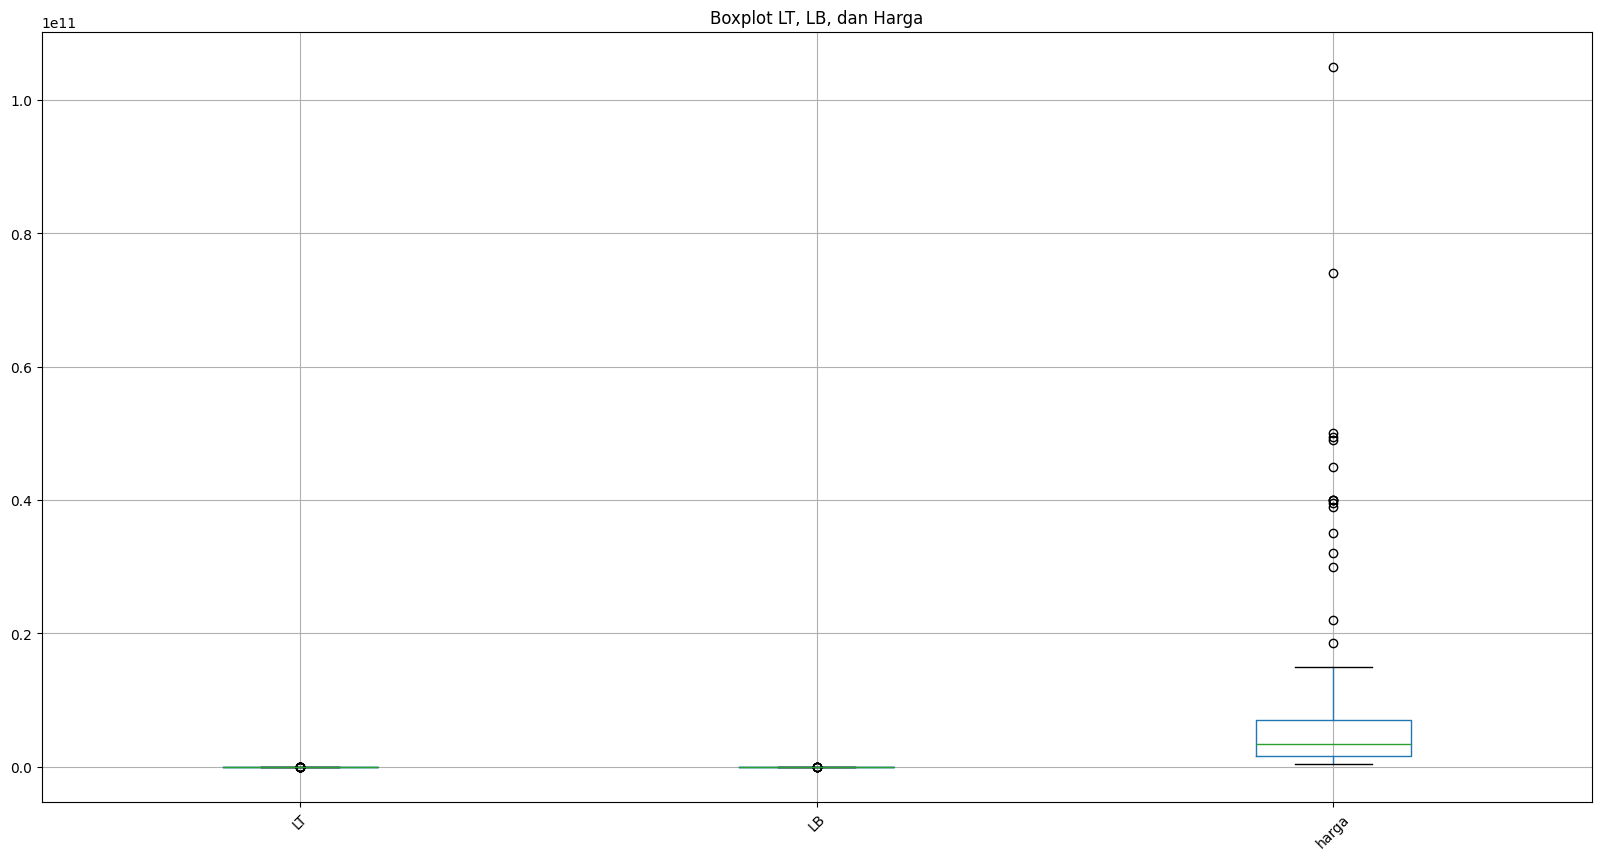

In [ ]:
# Mengecek noise dari data Numerik
dfJ3[['LT', 'LB', 'harga']].boxplot(figsize=(20,10))
plt.title("Boxplot LT, LB, dan Harga")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Mengecek noise dari data kategorik
dfJ3['KT'].value_counts()

,count
KT,
5,32
3,29
4,20
2,12
6,11
1,6
7,5
10,4
8,3


In [ ]:
dfJ3['KM'].value_counts()

,count
KM,
3,30
2,28
4,27
5,16
1,12
6,6
10,3


In [ ]:
dfJ3['carport'].value_counts()

,count
carport,
1,71
2,38
3,6
4,2
6,2
5,1
8,1
10,1


In [ ]:
dfJ3['listrik'].value_counts()

,count
listrik,
2200,43
3500,23
4400,13
1300,10
5500,7
7700,4
11000,3
6600,3
33000,2


In [ ]:
dfJ3['sertifikat'].value_counts()

,count
sertifikat,
SHM,93
SHM + IMB,11
SHGB,8
PPJB,7
AJB,1
SHM + Hak Pakai,1
SHM + IMB + PBB,1


In [ ]:
dfJ3['lokasi'].value_counts()

,count
lokasi,
Jakarta Barat,26
Jakarta Utara,25
Jakarta Selatan,24
Jakarta Timur,24
Jakarta Pusat,23


In [ ]:
dfJ3['created_at'].value_counts()

,count
created_at,
2021-12-06,42
2021-12-07,14
2021-12-05,12
2021-12-02,8
2021-11-22,7
2021-11-06,7
2021-11-29,6
2021-12-03,4
2021-12-04,4


### Data Depok

In [ ]:
# Mengecek data
dfD3.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64
harga,int64


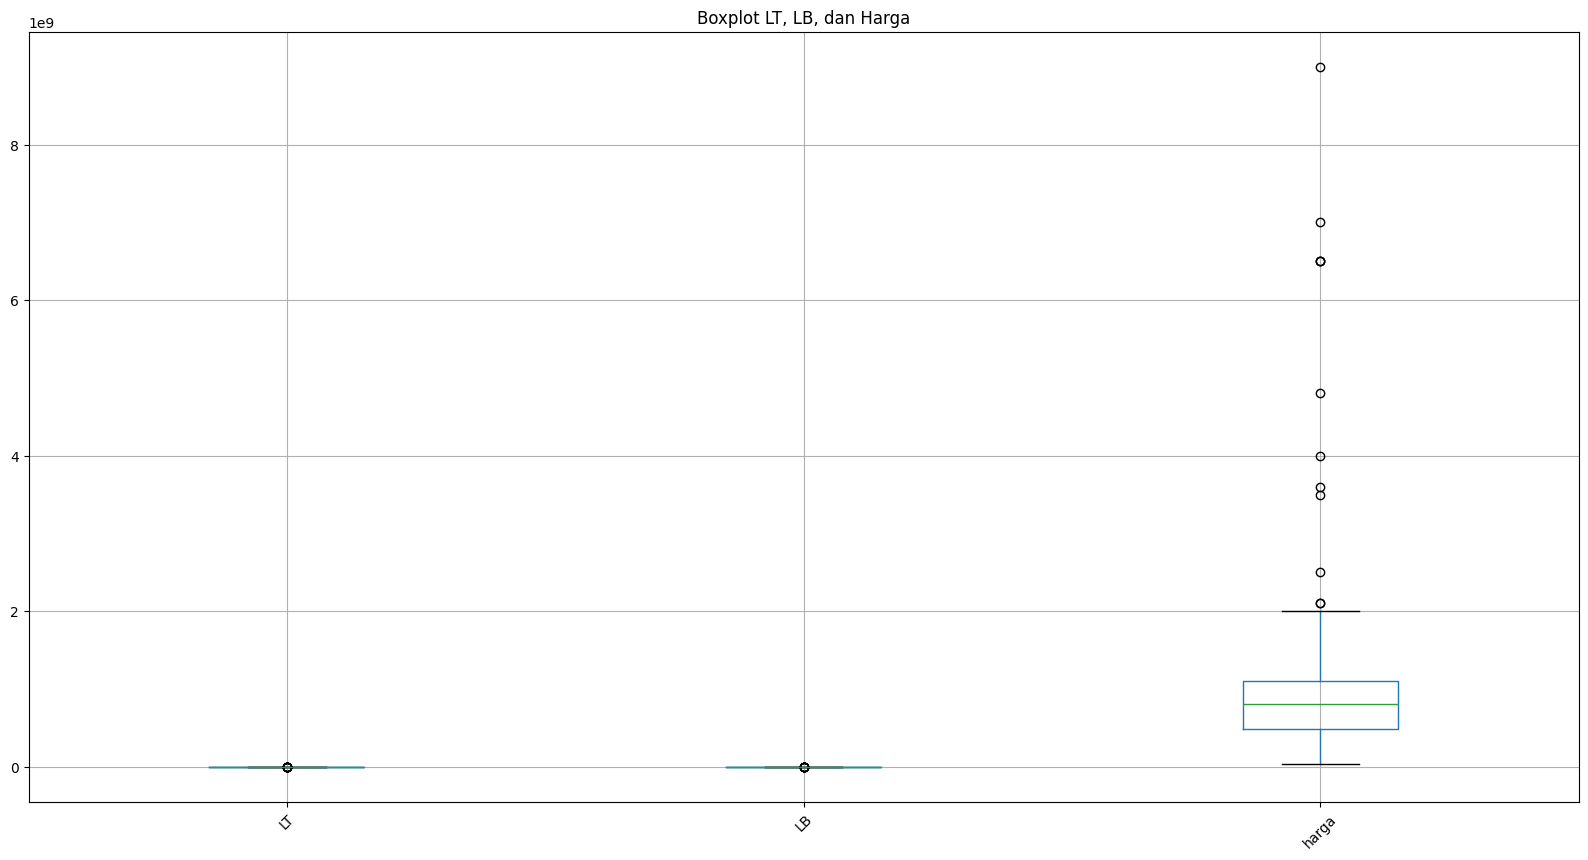

In [ ]:
# Mengecek noise dari data Numerik
dfD3[['LT', 'LB', 'harga']].boxplot(figsize=(20,10))
plt.title("Boxplot LT, LB, dan Harga")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Mengecek Noise dari data kategorik
dfD3['created_at'].value_counts()

,count
created_at,
2021-12-05,74
2021-12-04,23
2021-12-06,22


In [ ]:
dfD3['KT'].value_counts()

,count
KT,
2,61
3,46
4,8
7,3
5,2
6,1


In [ ]:
dfD3['KM'].value_counts()

,count
KM,
2,59
1,42
4,9
3,8
5,3


In [ ]:
dfD3['carport'].value_counts()

,count
carport,
1,75
2,41
6,2
5,1
3,1
7,1


In [ ]:
dfD3['listrik'].value_counts()

,count
listrik,
2200,80
1300,32
5500,2
3500,2
4400,1
6600,1
3300,1
10000,1
900,1


In [ ]:
dfD3['sertifikat'].value_counts()

,count
sertifikat,
SHM,119
Lainnya,2


In [ ]:
dfD3['lokasi'].value_counts()

,count
lokasi,
Sawangan,33
Cimanggis,25
Tapos,12
Cinere,12
Pancoran Mas,9
Sukmajaya,9
Cipayung,9
Beji,5
Cilodong,3


### Data Bogor

In [ ]:
# Mnegecek data
dfB3.dtypes

,0
created_at,datetime64[ns]
LT,Int64
LB,Int64
KT,Int64
KM,Int64
carport,Int64
lokasi,category
sertifikat,category
listrik,Int64
harga,Int64


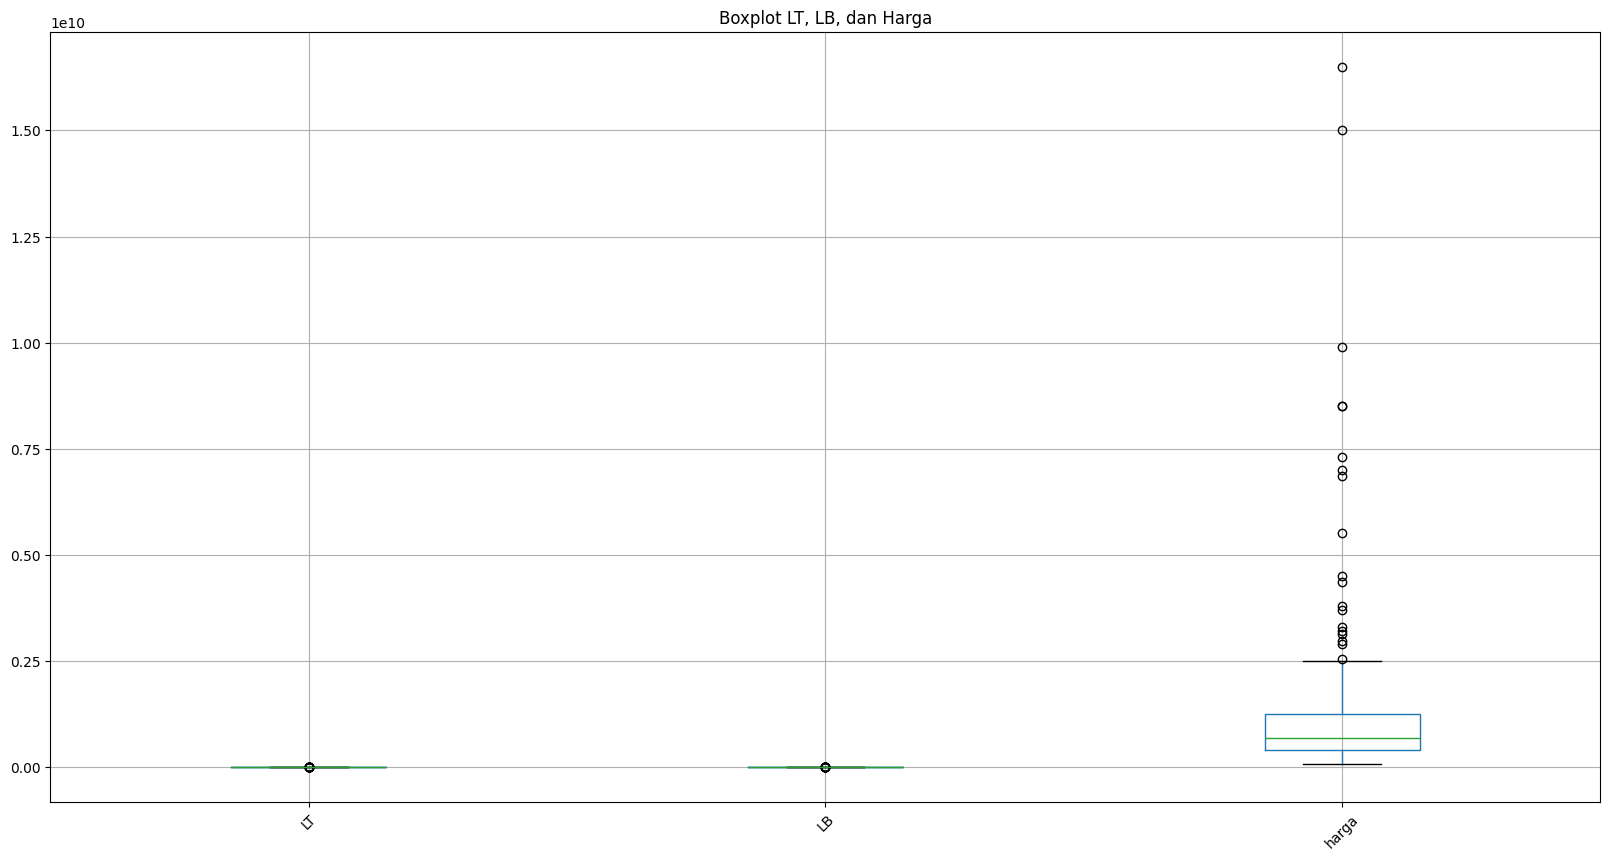

In [ ]:
# Mengecek noise dari data Numerik
dfB3[['LT', 'LB', 'harga']].boxplot(figsize=(20,10))
plt.title("Boxplot LT, LB, dan Harga")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Mengecek noise dari data kategorik
dfB3['created_at'].value_counts()

,count
created_at,
2021-12-06,52
2021-12-07,40
2021-12-03,22
2021-12-02,20
2021-12-01,20
2021-12-04,20
2021-12-05,20


In [ ]:
dfB3['KT'].value_counts()

,count
KT,
2,109
3,45
4,18
5,12
1,5
6,4
8,1


In [ ]:
dfB3['KM'].value_counts()

,count
KM,
1,107
2,51
3,20
5,7
4,5
6,4


In [ ]:
dfB3['carport'].value_counts()

,count
carport,
1,141
2,38
0,7
3,3
4,2
8,1
7,1
5,1


In [ ]:
dfB3['listrik'].value_counts()

,count
listrik,
1300,101
2200,68
5500,9
3500,8
4400,4
900,2
17600,1
6600,1


In [ ]:
dfB3['sertifikat'].value_counts()

,count
sertifikat,
SHM,156
SHGB,33
Lainnya,5


In [ ]:
dfB3['lokasi'].value_counts()

,count
lokasi,
Gunung Putri,27
Babakan Madang,25
Parung,20
Bogor Barat,16
Bojonggede,12
Cibinong,12
Cileungsi,11
Bogor Utara,11
Jonggol,7


### Data Tangerang

In [ ]:
# Mengecek tipe data
dfT3.dtypes

,0
created_at,datetime64[ns]
LT,int64
LB,int64
KT,int64
KM,int64
carport,int64
lokasi,category
sertifikat,category
listrik,int64
harga,int64


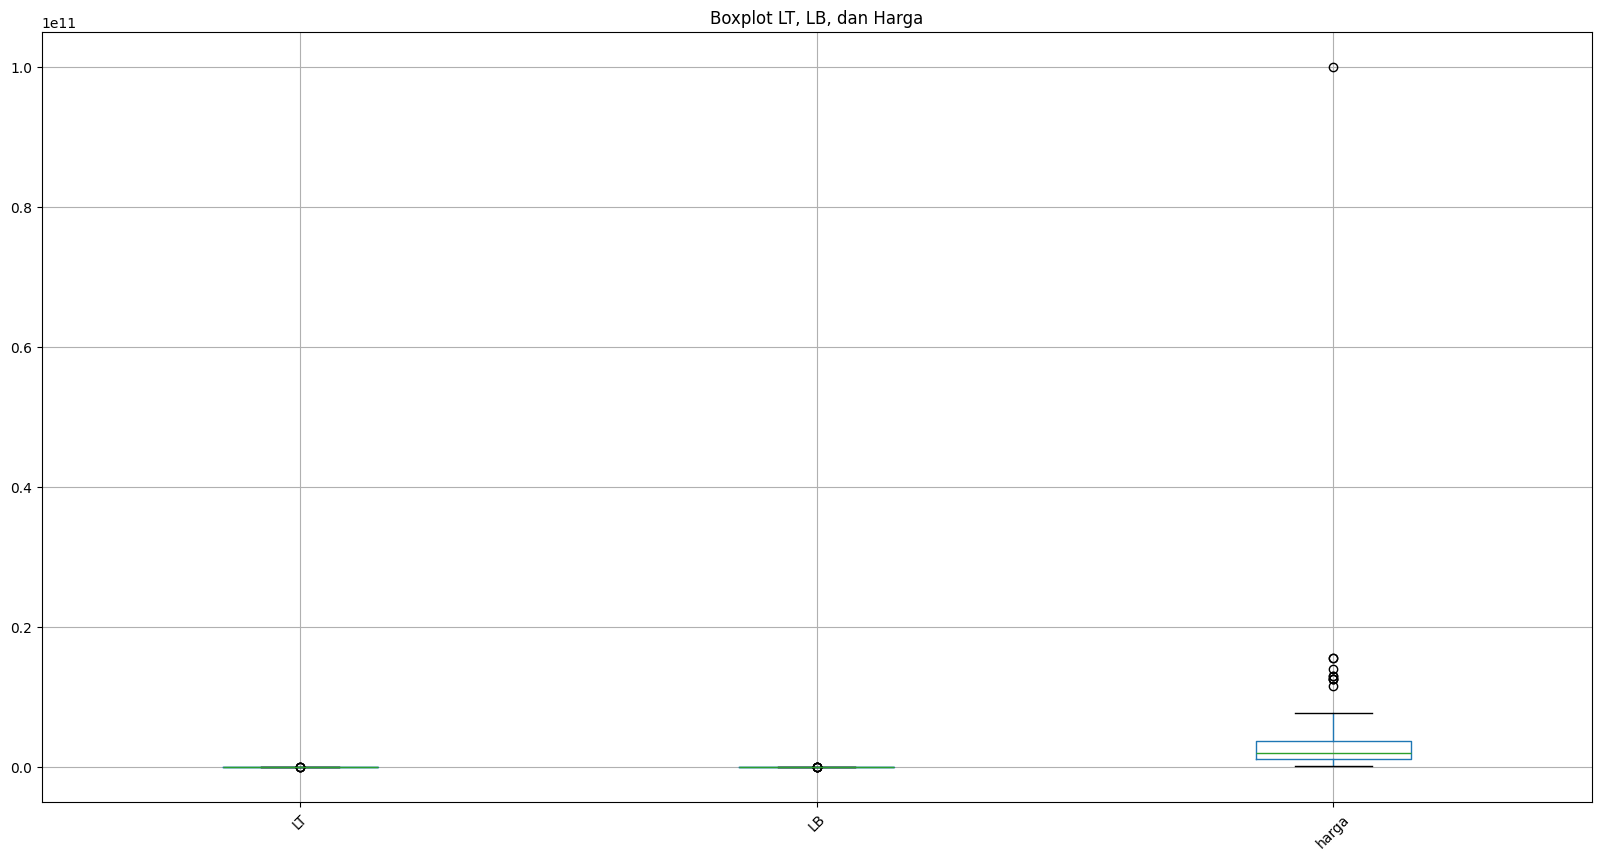

In [ ]:
# Mengecek noise dari data Numerik
dfT3[['LT', 'LB', 'harga']].boxplot(figsize=(20,10))
plt.title("Boxplot LT, LB, dan Harga")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Mengecek noise dari data kategorik
dfT3['created_at'].value_counts()

,count
created_at,
2021-06-12,102
2021-08-12,13
2021-07-12,10


In [ ]:
dfT3['KT'].value_counts()

,count
KT,
3,58
2,25
4,22
5,16
6,3
8,1


In [ ]:
dfT3['KM'].value_counts()

,count
KM,
2,49
3,30
1,18
4,15
5,10
6,2
8,1


In [ ]:
dfT3['carport'].value_counts()

,count
carport,
1,89
2,29
4,3
3,2
6,1
10,1


In [ ]:
dfT3['listrik'].value_counts()

,count
listrik,
2200,74
1300,13
4400,13
3500,7
5500,6
11000,3
16500,2
3300,2
2000,2


In [ ]:
dfT3['sertifikat'].value_counts()

,count
sertifikat,
SHM,99
"lainnya(PPJB, GIRIK, ADAT, dll)",15
HGB,11


In [ ]:
dfT3['lokasi'].value_counts()

,count
lokasi,
"BSD, TANGERANG",28
"BSD CITY, TANGERANG",21
"CISAUK, TANGERANG",8
"GADING SERPONG, TANGERANG",8
"BSD THE ICON, TANGERANG",6
"CIKUPA CITRA JAYA, TANGERANG",3
"LIPPO KARAWACI, TANGERANG",3
"CILEDUG, TANGERANG",3
"CIPONDOH, TANGERANG",3


### Data Bekasi

In [ ]:
dfX3.dtypes

,0
created_at,datetime64[ns]
LT,Int64
LB,Int64
KT,Int64
KM,Int64
carport,Int64
lokasi,category
sertifikat,category
listrik,Int64
harga,Int64


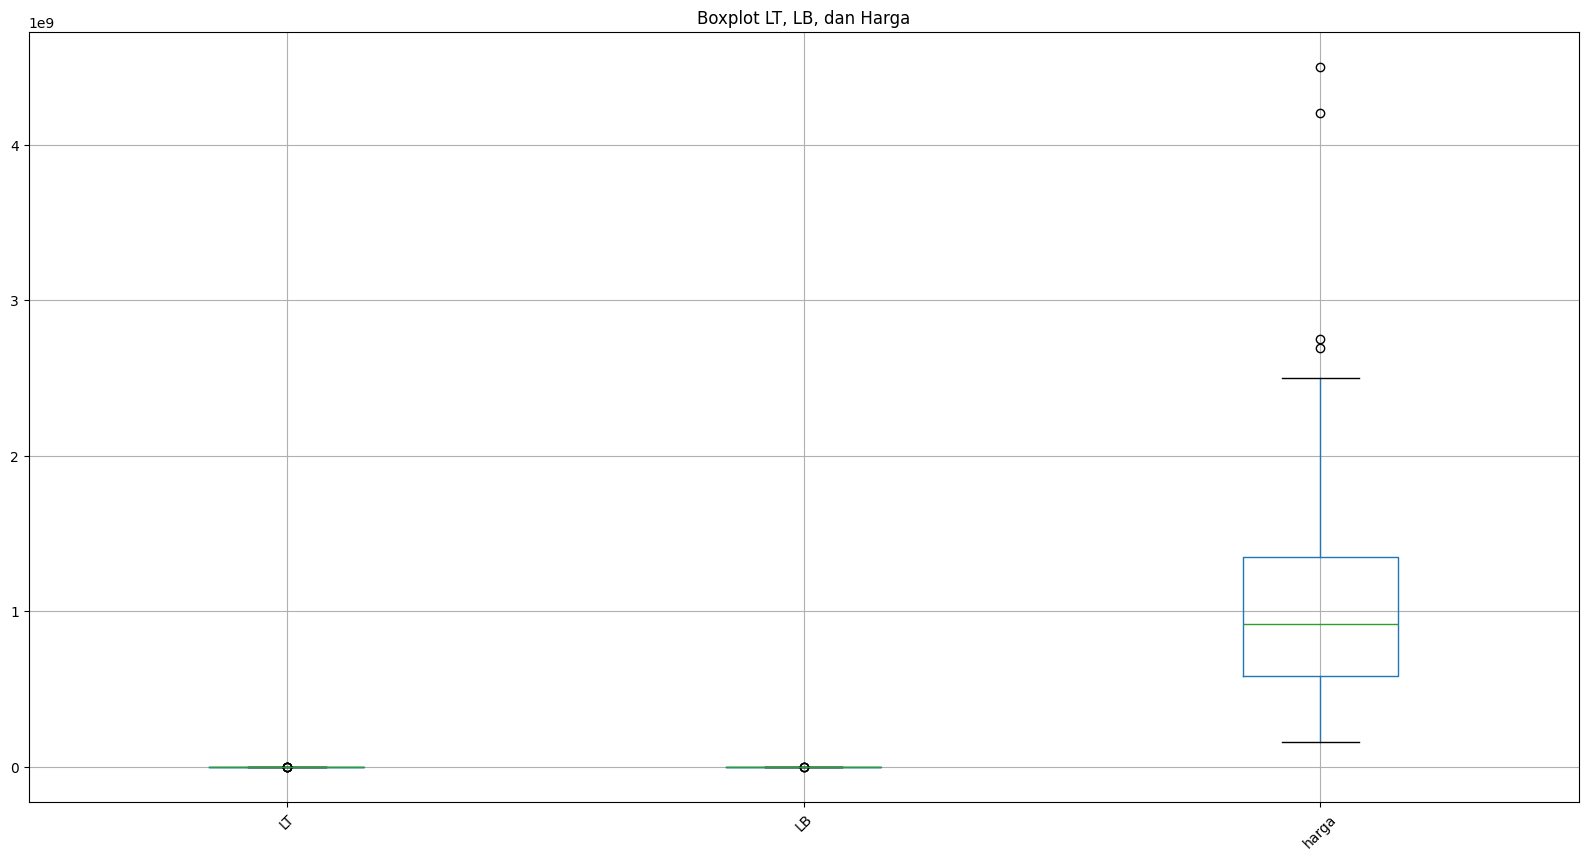

In [ ]:
# Mengecek noise dari data Numerik
dfX3[['LT', 'LB', 'harga']].boxplot(figsize=(20,10))
plt.title("Boxplot LT, LB, dan Harga")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Mengecek noise dari data kategorik
dfX3['KT'].value_counts()

,count
KT,
3,39
2,38
4,21
5,5
1,2
6,1
7,1


In [ ]:
dfX3['KM'].value_counts()

,count
KM,
2,44
1,37
3,23
4,4


In [ ]:
dfX3['carport'].value_counts()

,count
carport,
1,101
2,7


In [ ]:
dfX3['listrik'].value_counts()

,count
listrik,
2200,60
1300,35
5500,4
900,4
4400,3
3300,1
3500,1


In [ ]:
dfX3['sertifikat'].value_counts()

,count
sertifikat,
SHM,97
HGB,9
"SHM,IMB",2


In [ ]:
dfX3['lokasi'].value_counts()

,count
lokasi,
Kota Bekasi,74
Kabupaten Bekasi,34


# Mengecek Outlier

### Data Jakarta

In [ ]:
# Cek Outlier
Q1J_harga = dfJ3['harga'].quantile(0.25)
Q2J_harga = dfJ3['harga'].quantile(0.50)
Q3J_harga = dfJ3['harga'].quantile(0.75)
IQRJ_harga = Q3J_harga - Q1J_harga
dfJ3_outlier = (dfJ3['harga'] <= Q1J_harga - 1.5*IQRJ_harga) | (dfJ3['harga'] >= Q3J_harga + 1.5*IQRJ_harga)
print(f"Banyaknya outlier {'harga'} = ",sum(dfJ3_outlier))

Banyaknya outlier harga =  16


In [ ]:
# Data Outlier
dfJ_outlier_harga = dfJ3[dfJ3_outlier]

# Data non-outlier
dfJ_harga = dfJ3[~dfJ3_outlier]

# Menampilkan jumlah baris masing - masing
print("Jumlah data outlier:", len(dfJ_outlier_harga))
print("Jumlah data non-outlier:", len(dfJ_harga))

Jumlah data outlier: 16
Jumlah data non-outlier: 106


In [ ]:
dfJ_outlier_harga

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
6,2021-12-06,424,1000,4,5,1,Jakarta Pusat,SHM,33000,49500000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah mewah berkonsep hotel bintang 5, interio..."
7,2021-12-06,597,700,5,4,5,Jakarta Pusat,SHM,8000,40000000000,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis hanya 5 menit ke pusat kulin...
17,2021-12-05,652,405,5,4,4,Jakarta Pusat,SHM,6600,45000000000,https://www.rumah.com/listing-properti/dijual-...,Dapat dinego
18,2021-12-05,840,800,5,3,8,Jakarta Pusat,SHGB,6600,39990000000,https://www.rumah.com/listing-properti/dijual-...,"1 Arah, Trotoar Besar, pepohonan rindang asri ..."
21,2021-12-07,700,2000,10,10,10,Jakarta Pusat,SHM,66000,105000000000,https://www.rumah.com/listing-properti/dijual-...,- 2 menit ke Grand Indonesia (500 meter)\n- 5 ...
34,2021-12-06,485,550,3,5,1,Jakarta Selatan,SHM + IMB,18000,22000000000,https://rumahdijual.com/tebet/10851049-rmh-mew...,- Ruang Musik\n- Kitchen set ( dapur kotor dan...
40,2021-12-06,612,485,5,4,2,Jakarta Selatan,SHM,13000,18500000000,https://rumahdijual.com/jakarta-selatan/112558...,- Lantai Bawah : Master Bed Room dengan kamar ...
41,2021-12-06,790,700,6,6,6,Jakarta Selatan,SHM,7700,32000000000,https://rumahdijual.com/jakarta-selatan/110122...,Ada kolam renang
42,2021-12-05,950,1400,6,4,1,Jakarta Selatan,SHM,23000,49000000000,https://rumahdijual.com/jakarta-selatan/955358...,"Lantai 1 :\n- 1 Living Room, Family Room, Dinn..."
44,2021-12-07,738,500,5,3,2,Jakarta Selatan,SHM + IMB,13200,74000000000,https://rumahdijual.com/jakarta-pusat/6519312-...,- Unfurnished dan Air Jetpump\n- Berada dalam ...


In [ ]:
dfJ_harga

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-06,202,198,8,3,1,Jakarta Pusat,SHM,2200,4500000000,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,2021-12-02,30,55,2,1,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,2021-12-06,19,35,2,1,1,Jakarta Pusat,SHM,2200,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,2021-12-06,33,42,2,2,1,Jakarta Pusat,SHM,2200,835000000,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,2021-12-06,30,55,2,2,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...
117,2021-12-06,70,57,3,2,2,Jakarta Timur,SHM,2200,880000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,2021-12-06,315,280,4,3,2,Jakarta Timur,SHM + IMB,3500,4300000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,2021-12-06,135,190,5,5,2,Jakarta Timur,SHM + IMB,2200,3400000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...
120,2021-12-06,144,250,5,5,2,Jakarta Timur,SHM,3500,2250000000,https://www.rumah.com/listing-properti/dijual-...,Rumah Modern Minimalis dengan 2 lantai di Jati...


### Data Depok

In [ ]:
# Cek Outlier
Q1D_harga = dfD3['harga'].quantile(0.25)
Q2D_harga = dfD3['harga'].quantile(0.50)
Q3D_harga = dfD3['harga'].quantile(0.75)
IQRD_harga = Q3D_harga - Q1D_harga
dfD3_outlier = (dfD3['harga'] <= Q1D_harga - 1.5*IQRD_harga) | (dfD3['harga'] >= Q3D_harga + 1.5*IQRD_harga)
print(f"Banyaknya outlier {'harga'} = ",sum(dfD3_outlier))

Banyaknya outlier harga =  12


In [ ]:
# Data Outlier
dfD_outlier_harga = dfD3[dfD3_outlier]

# Data non-outlier
dfD_harga = dfD3[~dfD3_outlier]

# Menampilkan jumlah baris masing - masing
print("Jumlah data outlier:", len(dfD_outlier_harga))
print("Jumlah data non-outlier:", len(dfD_harga))

Jumlah data outlier: 12
Jumlah data non-outlier: 109


In [ ]:
dfD_outlier_harga

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-06,165,200,4,2,1,Sukmajaya,SHM,2200,2100000000,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
11,2021-12-06,210,250,4,4,1,Cimanggis,SHM,2200,2100000000,https://www.rumah123.com/properti/depok/hos928...,RUMAH DALAM KOMPLEK BESAR. JLN LEBAR. DEPOK
23,2021-12-05,487,450,6,3,5,Pancoran Mas,SHM,2200,4000000000,https://www.rumah123.com/properti/depok/hos928...,Beli Rumah Bonus Ruko & Kontrakan di Pesona Ka...
24,2021-12-05,378,289,4,4,3,Sukmajaya,SHM,5500,7000000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah di Pesona Khayangan Mungil Dekat U...
25,2021-12-05,400,226,5,4,1,Cinere,SHM,2200,3600000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Full Furnish Marmer di Megapolitan...
28,2021-12-05,1024,400,7,5,6,Limo,SHM,4400,6500000000,https://www.rumah123.com/properti/depok/hos928...,Rumah plus paviliun dengan taman luas selangka...
29,2021-12-05,1024,400,7,5,6,Cinere,SHM,5500,6500000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Tanah Luas Siap Huni Lingkungan Se...
32,2021-12-05,151,180,3,3,1,Pancoran Mas,SHM,2200,3500000000,https://www.rumah123.com/properti/depok/hos928...,Rumah 2 Lantai di Pesona Kayangan Margonda Depok
33,2021-12-05,885,600,7,4,2,Cimanggis,SHM,6600,6500000000,https://www.rumah123.com/properti/depok/hos928...,"Rumah luas tanah besar, kolam renang dan taman..."
38,2021-12-05,249,260,3,2,1,Bojong Sari,Lainnya,2200,2500000000,https://www.rumah123.com/properti/depok/hos924...,Rumah bagus daerah reni jaya depok


In [ ]:
dfD_harga

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
1,2021-12-06,50,45,2,1,1,Cipayung,SHM,1300,250000000,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,2021-12-06,50,36,2,1,1,Sawangan,SHM,1300,250000000,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,2021-12-06,50,45,2,1,1,Cimanggis,SHM,1300,250000000,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,2021-12-06,72,45,2,1,1,Sawangan,SHM,1300,350000000,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
5,2021-12-06,40,30,2,1,1,Cipayung,SHM,1300,130000000,https://www.rumah123.com/properti/depok/hos928...,Promo akhir tahun rumah cantik dijual murah mu...
...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-12-04,50,50,2,1,1,Cipayung,SHM,1300,185000000,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,2021-12-04,100,15,3,3,1,Cinere,SHM,3500,1750000000,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
118,2021-12-04,72,61,2,2,1,Sawangan,SHM,2200,810000000,URL tidak tersedia,Deskripsi tidak tersedia
120,NaT,72,61,2,2,1,Sawangan,SHM,2200,810000000,URL tidak tersedia,Deskripsi tidak tersedia


### Data Bogor

In [ ]:
# Cek Outlier
Q1B_harga = dfB3['harga'].quantile(0.25)
Q2B_harga = dfB3['harga'].quantile(0.50)
Q3B_harga = dfB3['harga'].quantile(0.75)
IQRB_harga = Q3B_harga - Q1B_harga
dfB3_outlier = (dfB3['harga'] <= Q1B_harga - 1.5*IQRB_harga) | (dfB3['harga'] >= Q3B_harga + 1.5*IQRB_harga)
print(f"Banyaknya outlier {'harga'} = ",sum(dfB3_outlier))

Banyaknya outlier harga =  19


In [ ]:
# Data Outlier
dfB_outlier_harga = dfB3[dfB3_outlier]

# Data non-outlier
dfB_harga = dfB3[~dfB3_outlier]

# Menampilkan jumlah baris masing - masing
print("Jumlah data outlier:", len(dfD_outlier_harga))
print("Jumlah data non-outlier:", len(dfB_harga))

Jumlah data outlier: 12
Jumlah data non-outlier: 175


In [ ]:
dfB_outlier_harga

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
26,2021-12-06,1500,1200,8,6,8,Cileungsi,SHM,17600,9900000000,https://www.rumah.com/listing-properti/dijual-...,"Akses mobil besar 40 ft bisa masuk, parkir mob..."
27,2021-12-06,699,350,5,5,2,Babakan Madang,SHM,3500,7300000000,https://www.rumah.com/listing-properti/dijual-...,"Plus kolam renang Babakan Madang, dekat dengan..."
36,2021-12-06,314,300,4,4,7,Bogor Timur,SHM,3500,2900000000,https://www.rumah.com/listing-properti/dijual-...,"Taman+Gazebo, Selangkah ke Tol&Terminal Barana..."
37,2021-12-06,1272,500,4,5,2,Babakan Madang,SHM,5500,15000000000,https://www.rumah.com/listing-properti/dijual-...,Rumah best view
40,2021-12-06,338,250,4,3,2,Babakan Madang,SHM,3500,3700000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan view golf, dekat sekolah, beberap..."
46,2021-12-06,167,300,4,3,0,Gunung Putri,SHM,5500,3200000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat Water Splash CIbubur Country, 10 menit k..."
50,2021-12-06,200,202,5,5,2,Gunung Putri,SHM,4400,3128000000,https://www.rumah.com/listing-properti/dijual-...,"One gate system, keamanan 24 jam, fasilitas le..."
52,2021-12-06,162,164,5,5,2,Gunung Putri,SHM,3500,2536000000,https://www.rumah.com/listing-properti/dijual-...,"Fasilitas lengkap , dekat dengan fasilitas kom..."
54,2021-12-07,200,260,4,4,1,Gunung Putri,SHM,4400,2975000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah siap huni, lokasi strategis"
93,2021-12-02,240,358,4,2,1,Babakan Madang,SHM,2200,4500000000,https://www.rumah123.com/properti/bogor/hos927...,Lokasi strategis


In [ ]:
dfB_harga

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-03,75,38,2,1,1,Bojonggede,SHM,1300,692550000,https://rumahdijual.com/bekasi/10799791-rumah-...,"Dekat tol jati warna, dekat sutle busway, deka..."
1,2021-12-06,60,40,1,1,1,Babakan Madang,SHM,2200,811400000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
2,2021-12-06,60,50,2,2,1,Babakan Madang,SHM,2200,900500000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
3,2021-12-06,60,70,3,2,1,Babakan Madang,SHM,2200,1001900000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
4,2021-12-06,90,60,3,2,2,Babakan Madang,SHM,2200,1200800000,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
...,...,...,...,...,...,...,...,...,...,...,...,...
189,2021-12-03,107,31,2,1,1,Sukaraja,SHM,1300,408650000,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni
190,2021-12-03,210,150,4,2,1,Bogor Selatan,SHM,2200,1200000000,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota
191,2021-12-03,90,36,2,1,1,Cileungsi,SHM,1300,440550000,https://www.rumah.com/listing-properti/dijual-...,"Dekat rumah sakit, dekat pasar"
192,2021-12-03,72,90,3,2,1,Cibinong,SHM,2200,900000000,https://www.rumah.com/listing-properti/dijual-...,"Nyaman, aman, swimming pool"


### Data Tangerang

In [ ]:
# Cek Outlier
Q1T_harga = dfT3['harga'].quantile(0.25)
Q2T_harga = dfT3['harga'].quantile(0.50)
Q3T_harga = dfT3['harga'].quantile(0.75)
IQRT_harga = Q3T_harga - Q1T_harga
dfT3_outlier = (dfT3['harga'] <= Q1T_harga - 1.5*IQRT_harga) | (dfT3['harga'] >= Q3T_harga + 1.5*IQRT_harga)
print(f"Banyaknya outlier {'harga'} = ",sum(dfT3_outlier))

Banyaknya outlier harga =  10


In [ ]:
# Data Outlier
dfT_outlier_harga = dfT3[dfT3_outlier]

# Data non-outlier
dfT_harga = dfT3[~dfT3_outlier]

# Menampilkan jumlah baris masing - masing
print("Jumlah data outlier:", len(dfT_outlier_harga))
print("Jumlah data non-outlier:", len(dfT_harga))

Jumlah data outlier: 10
Jumlah data non-outlier: 115


In [ ]:
dfT_outlier_harga

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
20,2021-06-12,276,441,4,4,2,"BSD CITY, TANGERANG",SHM,11000,13000000000,https://www.rumah123.com/properti/tangerang/ho...,Miliki Hunian Eksklusif dengan akses langsung ...
32,2021-06-12,534,1000,5,6,2,"BSD, TANGERANG",SHM,16500,15500000000,https://www.rumah123.com/properti/tangerang/ho...,"New Home\nRUMAH MEWAH TAMAN TIRTA GOLF BSD, Lt..."
47,2021-06-12,625,500,5,3,2,"BSD, TANGERANG",SHM,5500,12500000000,https://www.rumah123.com/properti/tangerang/ho...,"Di Jual Rumah di Bsd, Aman dan Nyaman, Komplek..."
49,2021-06-12,534,1000,8,8,6,"BSD, TANGERANG",SHM,16500,15500000000,https://www.rumah123.com/properti/tangerang/ho...,Dijual rumah brand new TAMAN TIRTA GOLF BSD\nL...
54,2021-06-12,474,500,6,5,2,"BSD DE PARK, TANGERANG",SHM,23000,12500000000,https://www.rumah123.com/properti/tangerang/ho...,"LT 474, LB +/- 500 (full renovated), KT 6+2, K..."
66,2021-06-12,276,441,4,4,1,"BSD FORESTA, TANGERANG",SHM,2200,14000000000,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVA PARK by HONGKONG LAND & SINARMAS L...
67,2021-06-12,276,441,5,5,1,"BSD CITY, TANGERANG",HGB,3500,12600000000,https://www.rumah123.com/properti/tangerang/ho...,"Rumah Dijual Tangerang , Hot, rumah sultan ter..."
76,2021-06-12,230,370,4,4,1,"CISAUK, TANGERANG",HGB,3500,11600000000,https://www.rumah123.com/properti/tangerang/ho...,LOKASI LAUREL SANGAT STRATEGIS SELANGKAH KE BO...
100,2021-06-12,3087,2500,5,5,10,"BSD BUKIT GOLF, TANGERANG",SHM,66000,100000000000,https://www.rumah123.com/properti/tangerang/ho...,Rumah Super Mewah Bukit Golf BSD City rumah me...
114,2021-08-12,276,441,4,4,4,"BSD, TANGERANG",SHM,11000,13000000000,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVAPARK @ BSD City Tangerang Phase2. D...


In [ ]:
dfT_harga

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-06-12,60,50,3,2,1,"BSD CITY, TANGERANG",SHM,1300,500000000,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,2021-06-12,72,54,2,1,1,"CISAUK, TANGERANG",SHM,1300,480000000,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,2021-06-12,60,48,3,2,2,"CILEDUG, TANGERANG",SHM,2200,600000000,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,2021-06-12,200,225,5,4,1,"LIPPO KARAWACI, TANGERANG",SHM,5500,4250000000,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,2021-06-12,76,123,3,3,2,"PONDOK CABE, TANGERANG",SHM,2200,1700000000,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...
120,2021-08-12,66,70,3,2,1,"Ciater, Tangerang",SHM,1300,850000000,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,2021-08-12,202,85,4,3,1,"BSD Griya Loka, Tangerang",SHM,2200,1860000000,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,2021-08-12,108,130,3,3,1,"Pagedangan, Tangerang",SHM,2200,1800000000,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,2021-08-12,91,91,3,2,1,"Poris, Tangerang",SHM,3500,1000000000,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


### Data Bekasi

In [ ]:
# Cek Outlier
Q1X_harga = dfX3['harga'].quantile(0.25)
Q2X_harga = dfX3['harga'].quantile(0.50)
Q3X_harga = dfX3['harga'].quantile(0.75)
IQRX_harga = Q3X_harga - Q1X_harga
dfX3_outlier = (dfX3['harga'] <= Q1X_harga - 1.5*IQRX_harga) | (dfX3['harga'] >= Q3X_harga + 1.5*IQRX_harga)
print(f"Banyaknya outlier {'harga'} = ",sum(dfX3_outlier))

Banyaknya outlier harga =  4


In [ ]:
# Data Outlier
dfX_outlier_harga = dfX3[dfX3_outlier]

# Data non-outlier
dfX_harga = dfX3[~dfX3_outlier]

# Menampilkan jumlah baris masing - masing
print("Jumlah data outlier:", len(dfX_outlier_harga))
print("Jumlah data non-outlier:", len(dfX_harga))

Jumlah data outlier: 4
Jumlah data non-outlier: 104


In [ ]:
dfX_outlier_harga

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
7,2021-12-07,336,200,4,3,1,Kabupaten Bekasi,HGB,5500,4200000000,https://www.99.co/id/properti/rumah-cluster-pa...,"Harga Rp 4,2 Miliyar ( Nego ); Luas Tanah 336 ..."
15,2021-12-06,245,117,3,2,1,Kota Bekasi,SHM,2200,2750000000,https://www.rumah123.com/properti/bekasi/hos91...,"Rumah 1 lantai Hook, Lokasi yang Strategis dek..."
31,2021-12-06,200,293,6,4,1,Kota Bekasi,SHM,5500,4500000000,https://www.99.co/id/properti/rumah-mewah-harg...,"Jual cepat rumah mewah harga murah , 3 Lantai,..."
100,2021-12-01,144,180,4,3,2,Kota Bekasi,SHM,4400,2690000000,https://www.rumah123.com/properti/bekasi/hos92...,Rumah cantik furmished dan renovasi di asera o...


In [ ]:
dfX_harga

,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-08,71,43,2,1,1,Kabupaten Bekasi,SHM,1300,550000000,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,2021-12-08,59,60,2,1,1,Kabupaten Bekasi,SHM,2200,440000000,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,2021-12-08,124,95,2,1,1,Kabupaten Bekasi,SHM,2200,699000000,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,2021-12-08,144,100,2,1,1,Kabupaten Bekasi,SHM,2200,1350000000,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,2021-12-08,108,100,3,2,1,Kabupaten Bekasi,SHM,2200,1400000000,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...
103,2021-12-01,140,250,3,2,1,Kabupaten Bekasi,SHM,2200,850000000,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,2021-12-01,60,55,2,1,1,Kabupaten Bekasi,SHM,1300,250000000,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,2021-12-01,36,60,2,1,1,Kabupaten Bekasi,SHM,1300,300000000,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."
106,2021-12-01,60,55,2,1,1,Kabupaten Bekasi,SHM,1300,250000000,https://www.rumah123.com/properti/bekasi/hos92...,RCG/20/V/010 MP/LB/THM/010 Di jual Rumah Lelan...


# PENYELESAIAN

In [ ]:
# Gabungkan semua outlier dari tiap kota
combined_outliers = pd.concat(
    [dfJ_outlier_harga, dfD_outlier_harga, dfB_outlier_harga, dfT_outlier_harga, dfX_outlier_harga],
    ignore_index=True
)

print("Total data outlier:", combined_outliers.shape)
display(combined_outliers.head())

# Gabungkan semua data clean (tanpa outlier) dari tiap kota
combined_clean = pd.concat(
    [dfJ_harga, dfD_harga, dfB_harga, dfT_harga, dfX_harga],
    ignore_index=True
)

print("Total data clean:", combined_clean.shape)
display(combined_clean.head())

Total data outlier: (61, 12)


,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-06,424,1000,4,5,1,Jakarta Pusat,SHM,33000,49500000000,https://www.rumah.com/listing-properti/dijual-...,"Rumah mewah berkonsep hotel bintang 5, interio..."
1,2021-12-06,597,700,5,4,5,Jakarta Pusat,SHM,8000,40000000000,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis hanya 5 menit ke pusat kulin...
2,2021-12-05,652,405,5,4,4,Jakarta Pusat,SHM,6600,45000000000,https://www.rumah.com/listing-properti/dijual-...,Dapat dinego
3,2021-12-05,840,800,5,3,8,Jakarta Pusat,SHGB,6600,39990000000,https://www.rumah.com/listing-properti/dijual-...,"1 Arah, Trotoar Besar, pepohonan rindang asri ..."
4,2021-12-07,700,2000,10,10,10,Jakarta Pusat,SHM,66000,105000000000,https://www.rumah.com/listing-properti/dijual-...,- 2 menit ke Grand Indonesia (500 meter)\n- 5 ...


Total data clean: (609, 12)


,created_at,LT,LB,KT,KM,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-06,202,198,8,3,1,Jakarta Pusat,SHM,2200,4500000000,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,2021-12-02,30,55,2,1,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,2021-12-06,19,35,2,1,1,Jakarta Pusat,SHM,2200,395000000,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,2021-12-06,33,42,2,2,1,Jakarta Pusat,SHM,2200,835000000,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,2021-12-06,30,55,2,2,1,Jakarta Pusat,SHM,2200,1100000000,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."


In [ ]:
# --- CEK KUALITAS DATA PER KOTA ---

def cek_kualitas_data(df, nama_kota):
    print(f"===== {nama_kota} =====")
    print("Jumlah data:", len(df))
    print("Missing values:\n", df.isnull().sum())
    print("Jumlah duplikat:", df.duplicated().sum())
    print("Tipe data:\n", df.dtypes)
    print(df.describe())
    print("\n")

# Cek semua kota
cek_kualitas_data(dfJ3, "Jakarta")
cek_kualitas_data(dfD3, "Depok")
cek_kualitas_data(dfB3, "Bandung")
cek_kualitas_data(dfT3, "Tanggerang")
cek_kualitas_data(dfX3, "Bekasi")

===== Jakarta =====
Jumlah data: 122
Missing values:
 created_at    0
LT            0
LB            0
KT            0
KM            0
carport       0
lokasi        0
sertifikat    0
listrik       0
harga         0
URL           0
deskripsi     0
dtype: int64
Jumlah duplikat: 0
Tipe data:
 created_at    datetime64[ns]
LT                     Int64
LB                     Int64
KT                     Int64
KM                     Int64
carport                Int64
lokasi              category
sertifikat          category
listrik                Int64
harga                  Int64
URL                   object
deskripsi             object
dtype: object
                          created_at          LT          LB        KT  \
count                            122       122.0       122.0     122.0   
mean   2021-11-27 03:20:39.344262400  246.663934  278.844262  4.278689   
min              2021-02-12 00:00:00        16.0        21.0       1.0   
25%              2021-11-29 00:00:00       84.25    

## 1. Kualitas data yang dimiliki perusahaan

Menurut kami, kualitas data yang dimiliki oleh perusahaan dapat dikatakan kurang baik, dikarenakan:

1. Banyaknya variabel yang tidak diketahui nilainya
2. Ada variabel yang nilainya hampir kosong, sehingga tidak memberikan informasi yang signifikan
3. Beberapa variabel numerik, seperti LT (Luas Tanah) dan LB (Luas Bangunan), masih tersimpan dalam bentuk string sehingga perlu dikonversi agar dapat diproses lebih lanjut
4. Ditemukan harga rumah yang tidak konsisten, yang seharusnya jutaan namun tercatat sangat kecil atau justru tidak realistis besarannya.


Kualitas data perusahaan masih perlu diperbaiki karena ditemukan masalah berupa missing values, variabel yang hampir kosong, tipe data yang tidak sesuai, serta inkonsistensi harga. Kondisi tersebut membuat hasil analisis yang dihasilkan dari data belum sepenuhnya akurat. Akan tetapi, setelah dilakukan EDA, maka data menjadi lebih rapi, konsisten, dan layak digunakan untuk analisis lebih lanjut maupun pengambilan keputusan yang tepat.


## 2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.

Saran Perbaikan Data kepada Tim DE/DBA:

1. Pembersihan Kolom yang Tidak Relevan

     Tim DE/DBA perlu melakukan identifikasi serta menghapus kolom-kolom yang tidak relevan atau sepenuhnya kosong (misalnya kolom dengan label Unnamed: XX) sejak tahap awal proses ekstraksi maupun ETL (Extract, Transform, Load).
     
    Langkah ini dapat mengurangi ukuran dataset, meningkatkan efisiensi pemrosesan, serta menghilangkan noise yang tidak diperlukan dalam analisis.

2. Penanganan Nilai Hilang (Missing Values) secara Lebih Efektif

    a. Identifikasi Sumber Permasalahan: DE/DBA perlu menelusuri penyebab tingginya jumlah nilai hilang, apakah berasal dari proses web scraping yang tidak sempurna, input manual yang tidak lengkap, atau keterbatasan pada sumber data itu sendiri.

    b. Perbaikan Strategi Pengumpulan Data: Jika permasalahan muncul pada proses scraping, maka skrip perlu diperbaiki agar dapat menangkap seluruh informasi dengan benar. Jika permasalahan berasal dari input manual, diperlukan validasi input yang lebih ketat.

    c. Imputasi Data (bila relevan): Untuk nilai hilang yang tidak dapat dihindari, DE/DBA dapat menerapkan teknik imputasi yang sesuai (misalnya menggunakan nilai rata-rata, median, atau modus) setelah berkonsultasi dengan Data Analyst mengenai potensi dampaknya terhadap hasil analisis. Namun, prioritas utama tetap pada pencegahan nilai hilang sejak awal.

    Memperbaiki kelengkapan data sehingga analisis dapat dilakukan secara lebih komprehensif dan menghasilkan output yang lebih akurat.

3. Standardisasi Tipe Data

    Pastikan bahwa seluruh kolom numerik, seperti LT (Luas Tanah), LB (Luas Bangunan), KT (Kamar Tidur), KM (Kamar Mandi), listrik, dan harga, tersimpan dalam tipe data numerik yang sesuai (float64 atau int64). Apabila terdapat nilai non-numerik pada kolom tersebut, perlu dilakukan proses data cleaning baik dengan konversi maupun penghapusan data yang tidak sesuai.

    Menjamin integritas data, mempermudah operasi matematika serta analisis statistik, sekaligus meminimalkan risiko kesalahan pada proses pemodelan.

4. Penyediaan Dokumentasi Metadata yang Jelas

    Tim DE/DBA disarankan untuk menyediakan dokumentasi terperinci mengenai setiap kolom, meliputi definisi variabel, tipe data yang diharapkan, serta kemungkinan nilai yang dapat muncul. Dokumentasi ini akan sangat membantu Data Analyst dalam memahami struktur dataset dan mengidentifikasi potensi noise dan outlier.

    Mempercepat proses pemahaman data, mengurangi ambiguitas, serta meningkatkan efektivitas kolaborasi lintas tim.

5. Implementasi Validasi Data Secara Otomatis

    Membangun pipeline validasi data otomatis yang secara rutin memeriksa konsistensi, kelengkapan, serta kebenaran tipe data pada saat data dimasukkan ke dalam sistem. Sistem sebaiknya dilengkapi dengan mekanisme peringatan atau pesan kesalahan apabila data tidak sesuai dengan standar kualitas yang telah ditetapkan.

    Mencegah masuknya data berkualitas rendah ke dalam sistem, sehingga menjamin bahwa data yang digunakan dalam analisis selalu berada dalam kondisi terbaik.

## 3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

/tmp/ipython-input-1041624970.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="kota", y="harga", data=df_all, estimator=np.mean, ci=None)


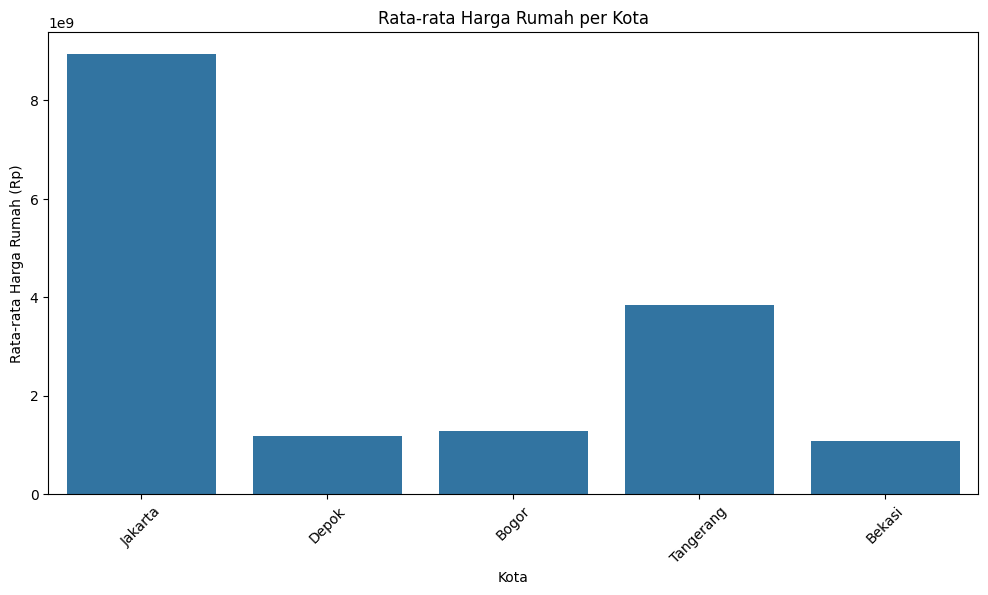

In [ ]:
# Tambah kolom kota

dfJ3["kota"] = "Jakarta"
dfD3["kota"] = "Depok"
dfB3["kota"] = "Bogor"
dfT3["kota"] = "Tangerang"
dfX3["kota"] = "Bekasi"

df_all = pd.concat([dfJ3, dfD3, dfB3, dfT3, dfX3], axis=0)

plt.figure(figsize=(12,6))
sns.barplot(x="kota", y="harga", data=df_all, estimator=np.mean, ci=None)
plt.xticks(rotation=45)
plt.title("Rata-rata Harga Rumah per Kota")
plt.xlabel("Kota")
plt.ylabel("Rata-rata Harga Rumah (Rp)")
plt.show()

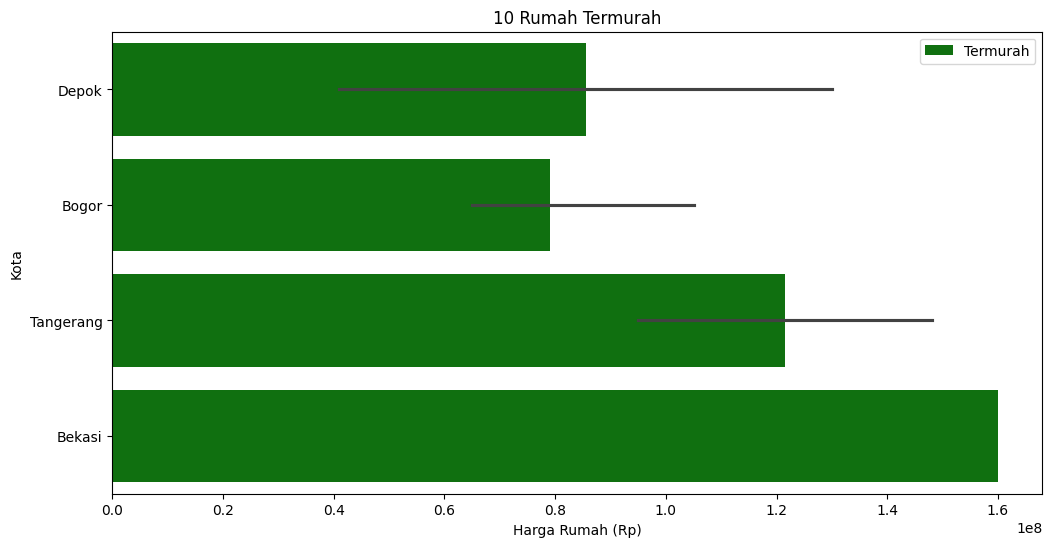

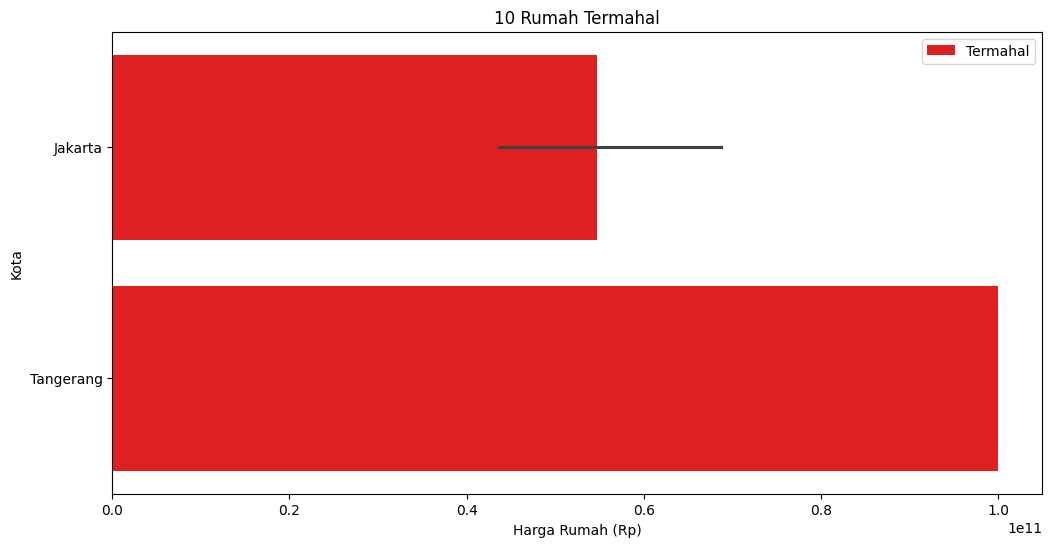

In [ ]:
# 10 termurah & 10 termahal
df_all = pd.concat([dfJ3, dfD3, dfB3, dfT3, dfX3], axis=0)

termurah = df_all.nsmallest(10, "harga")
termahal = df_all.nlargest(10, "harga")

plt.figure(figsize=(12,6))
sns.barplot(x="harga", y="kota", data=termurah, color="green", label="Termurah")
plt.title("10 Rumah Termurah")
plt.xlabel("Harga Rumah (Rp)")
plt.ylabel("Kota")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x="harga", y="kota", data=termahal, color="red", label="Termahal")
plt.title("10 Rumah Termahal")
plt.xlabel("Harga Rumah (Rp)")
plt.ylabel("Kota")
plt.show()


Dari visualisasi diatas, dapat disimpulkan bahwa Jakarta menempati posisi dengan harga rata-rata tertinggi, disusul oleh Tangerang. Hal ini mengindikasikan bahwa rumah di Jakarta relatif lebih mahal, kemungkinan dipengaruhi oleh faktor lokasi yang strategis, fasilitas umum yang lengkap, serta tingginya permintaan.

## 4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).

Berdasarkan analisis harga rumah, Jakarta menjadi lokasi dengan potensi pasar terbesar karena harga rata-rata yang paling tinggi, meskipun kompetisi dan biaya operasional juga tinggi. Tangerang menempati posisi kedua dengan pertumbuhan kawasan yang pesat dan daya tarik bagi konsumen menengah ke atas, sedangkan Bekasi dan Depok lebih terjangkau namun berfokus pada segmen menengah. Oleh karena itu, rekomendasi utama pembukaan kantor cabang baru adalah di Jakarta, dengan Tangerang sebagai pilihan alternatif yang strategis.

## 5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?

Karakteristik rumah yang paling banyak dijual:
- Jumlah kamar tidur: 2
- Jumlah kamar mandi: 2
- Luas tanah: 60-120 m²
- Luas bangunan: 50-100 m²


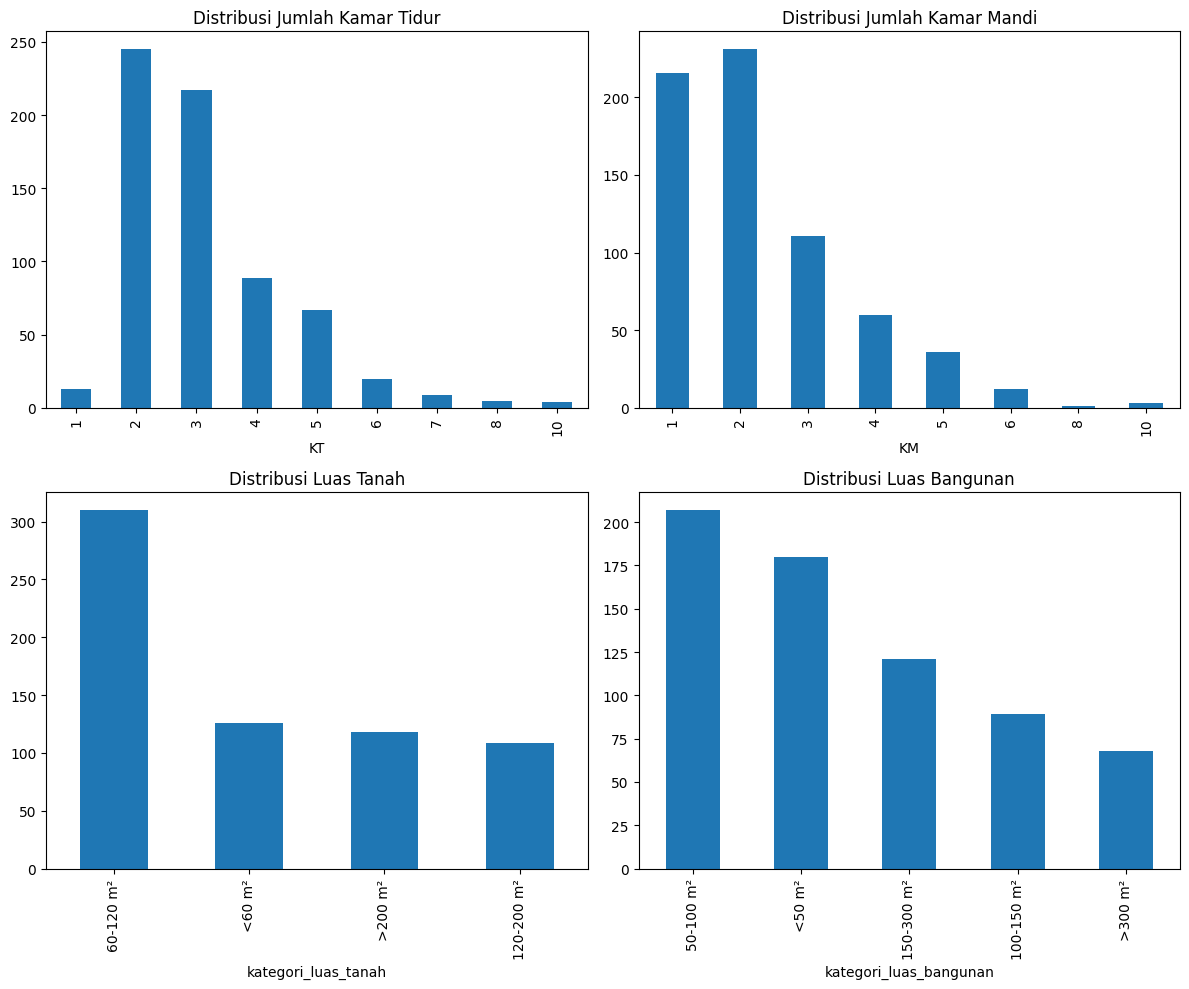

In [ ]:
import matplotlib.pyplot as plt

# --- Modus / karakteristik dominan ---
kt_modus = df_all['KT'].mode()[0]
km_modus = df_all['KM'].mode()[0]

# Binning luas tanah
bins_tanah = [0, 60, 120, 200, 1000]
labels_tanah = ['<60 m²', '60-120 m²', '120-200 m²', '>200 m²']
df_all['kategori_luas_tanah'] = pd.cut(df_all['LT'], bins=bins_tanah, labels=labels_tanah)
lt_modus = df_all['kategori_luas_tanah'].mode()[0]

# Binning luas bangunan
bins_bangunan = [0, 50, 100, 150, 300, 1000]
labels_bangunan = ['<50 m²', '50-100 m²', '100-150 m²', '150-300 m²', '>300 m²']
df_all['kategori_luas_bangunan'] = pd.cut(df_all['LB'], bins=bins_bangunan, labels=labels_bangunan)
lb_modus = df_all['kategori_luas_bangunan'].mode()[0]

print("Karakteristik rumah yang paling banyak dijual:")
print(f"- Jumlah kamar tidur: {kt_modus}")
print(f"- Jumlah kamar mandi: {km_modus}")
print(f"- Luas tanah: {lt_modus}")
print(f"- Luas bangunan: {lb_modus}")

# --- Visualisasi sederhana ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

df_all['KT'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title("Distribusi Jumlah Kamar Tidur")

df_all['KM'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title("Distribusi Jumlah Kamar Mandi")

df_all['kategori_luas_tanah'].value_counts().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title("Distribusi Luas Tanah")

df_all['kategori_luas_bangunan'].value_counts().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title("Distribusi Luas Bangunan")

plt.tight_layout()
plt.show()

Jumlah Kamar Tidur (KT):
Hasil analisis menunjukkan bahwa nilai modus untuk jumlah kamar tidur adalah 2. Visualisasi distribusi jumlah kamar tidur memperlihatkan frekuensi masing-masing kategori, di mana batang dengan tinggi paling besar menandakan jumlah kamar tidur tersebut merupakan karakteristik yang paling dominan pada rumah yang ditawarkan.

Jumlah Kamar Mandi (KM):
Nilai modus untuk jumlah kamar mandi adalah 2. Grafik distribusi memperlihatkan sebaran jumlah kamar mandi pada rumah yang dijual, sehingga dapat diidentifikasi kategori yang paling umum. Analisis ini membantu menentukan jumlah kamar mandi yang paling sering ditemukan dalam penawaran rumah.

Luas Tanah (LT):
Variabel luas tanah dikelompokkan berdasarkan rentang ukuran tertentu 60–120 m² Nilai modus kategori luas tanah adalah lt_modus. Distribusi kategori tersebut memperlihatkan kelompok luas tanah yang paling banyak tersedia di pasar.

Luas Bangunan (LB):
Luas bangunan juga dikategorikan ke dalam rentang tertentu. Nilai modus untuk kategori luas bangunan adalah 50-100 m². Grafik distribusi menunjukkan bahwa kelompok dengan kategori tersebut merupakan yang paling dominan.

Kesimpulan:
Berdasarkan analisis terhadap nilai modus dan distribusi data, dapat disimpulkan bahwa rumah yang paling banyak dijual memiliki jumlah kamar tidur sebanyak 2 dan jumlah kamar mandi sebanyak 2. Dari sisi ukuran, rumah dengan luas tanah pada kategori 60-120 m² serta luas bangunan pada kategori 50-100 m² merupakan tipe yang paling mendominasi pasar. Dengan demikian, karakteristik rumah yang paling umum dijual dalam data RPPI adalah rumah dengan jumlah kamar tidur dan kamar mandi sesuai nilai modus, serta ukuran tanah dan bangunan yang juga berada pada kategori modus. Informasi ini dapat dimanfaatkan oleh perusahaan untuk menentukan fokus pengembangan produk properti dan menyusun strategi pemasaran yang lebih selaras dengan kebutuhan mayoritas konsumen.

## 6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?

Apabila RPPI berencana melakukan investasi properti dengan alokasi dana maksimum sebesar Rp 25 miliar dalam waktu dekat, maka pemilihan unit rumah yang memiliki potensi keuntungan optimal menjadi hal yang krusial. Potensi keuntungan tersebut dapat ditinjau dari berbagai aspek, antara lain harga beli yang relatif terjangkau, karakteristik rumah yang sesuai dengan preferensi pasar seperti jumlah kamar tidur, luas tanah, maupun luas bangunan, serta prospek kenaikan nilai properti di masa mendatang yang dapat diperkirakan melalui analisis lokasi dan harga saat ini.

Berdasarkan data yang tersedia, langkah awal yang dapat dilakukan adalah menyaring unit rumah dengan total harga tidak melebihi Rp 25 miliar dan memiliki karakteristik yang populer, sebagaimana teridentifikasi dalam analisis sebelumnya mengenai rumah dengan penawaran terbanyak. Tahap selanjutnya adalah melakukan pengurutan rumah berdasarkan harga per meter persegi dengan kategori luas bangunan mulai dari <50 m² hingga >300 m², sehingga dapat dipilih rumah-rumah yang memberikan nilai investasi lebih efisien dan berpotensi mengoptimalkan keuntungan.

In [ ]:
import matplotlib.pyplot as plt
# Gabungkan semua data menjadi satu DataFrame
# Pastikan kolom harga dalam satuan milyar untuk kemudahan perhitungan
df_all['harga_milyar'] = df_all['harga'] / 1e9

In [ ]:
df_all['harga_per_m2'] = df_all['harga'] / df_all['LB']


In [ ]:
# Filter rumah dengan harga total <= 25 Milyar
df_investasi = df_all[df_all['harga_milyar'] <= 25]

In [ ]:
# Filter rumah dengan karakteristik populer (contoh: KT=3, KM=2, LT kategori 60-120, LB kategori 50-100)
df_investasi_filtered = df_investasi[
    (df_investasi['KT'] == 3) &
    (df_investasi['KM'] == 2) &
    (df_investasi['kategori_luas_tanah'] == '60-120 m²') &
    (df_investasi['kategori_luas_bangunan'] == '50-100 m²')
]

In [ ]:
# Urutkan berdasarkan harga per m2 terendah (investasi efisien)
df_investasi_sorted = df_investasi_filtered.sort_values(by='harga_per_m2')
# Tampilkan 10 rumah teratas yang direkomendasikan
print("Rekomendasi rumah untuk investasi dengan budget maksimal Rp 25 Milyar:")
display(df_investasi_sorted[['lokasi', 'KT', 'KM', 'LT', 'LB', 'harga_milyar', 'harga_per_m2', 'URL']].head(10))

Rekomendasi rumah untuk investasi dengan budget maksimal Rp 25 Milyar:


,lokasi,KT,KM,LT,LB,harga_milyar,harga_per_m2,URL
60,"BSD, TANGERANG",3,2,96,75,0.6,8000000.0,https://www.rumah123.com/properti/tangerang/ho...
18,"CILEDUG, TANGERANG",3,2,96,75,0.6,8000000.0,https://www.rumah123.com/properti/tangerang/ho...
45,Bojong Sari,3,2,79,68,0.548,8058823.529412,https://www.rumah123.com/properti/depok/hos928...
87,Kabupaten Bekasi,3,2,75,72,0.586,8138888.888889,https://www.rumah123.com/properti/bekasi/hos92...
62,Kota Bekasi,3,2,105,85,0.75,8823529.411765,https://www.rumah123.com/properti/bekasi/hos92...
74,Tapos,3,2,62,63,0.565,8968253.968254,https://www.rumah123.com/properti/depok/hos928...
156,Bogor Barat,3,2,89,69,0.623,9028985.507246,https://www.rumah.com/listing-properti/dijual-...
90,Cibinong,3,2,66,60,0.55,9166666.666667,https://www.rumah.com/listing-properti/dijual-...
162,Cibinong,3,2,79,90,0.845811,9397900.0,https://www.rumah.com/listing-properti/dijual-...
163,Cibinong,3,2,81,90,0.860211,9557900.0,https://www.rumah.com/listing-properti/dijual-...


Data yang ditampilkan menunjukkan sepuluh rumah teratas yang direkomendasikan sebagai alternatif investasi dengan kriteria harga tidak melebihi Rp 25 miliar serta memiliki karakteristik yang paling diminati pasar, yaitu tiga kamar tidur, dua kamar mandi, luas tanah antara 60–120 m², dan luas bangunan berkisar 50–100 m². Daftar tersebut diurutkan berdasarkan harga per meter persegi bangunan terendah, sehingga rumah-rumah yang dipilih dinilai lebih efisien sebagai instrumen investasi. Dengan demikian, properti tersebut memiliki potensi memberikan keuntungan lebih besar apabila terjadi peningkatan nilai harga di masa mendatang.

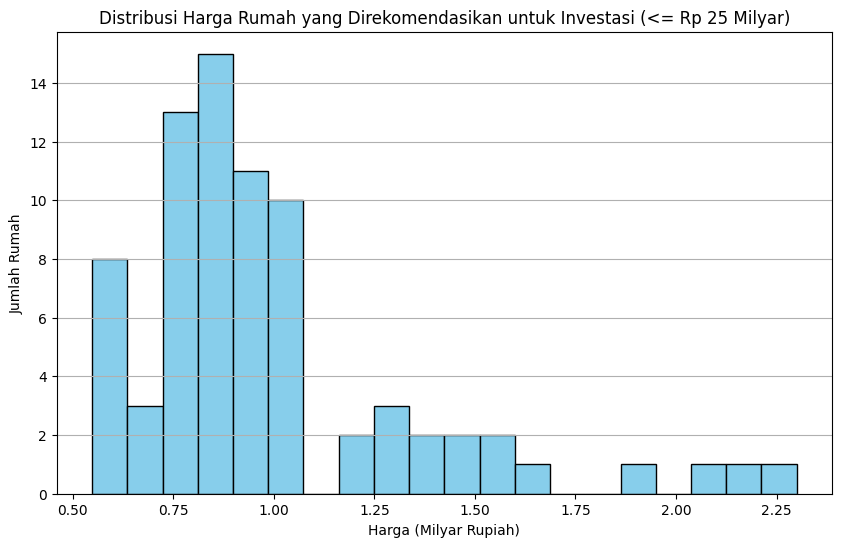

In [ ]:
# Visualisasi: Distribusi harga rumah yang memenuhi kriteria investasi
plt.figure(figsize=(10,6))
plt.hist(df_investasi_sorted['harga_milyar'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Harga Rumah yang Direkomendasikan untuk Investasi (<= Rp 25 Milyar)')
plt.xlabel('Harga (Milyar Rupiah)')
plt.ylabel('Jumlah Rumah')
plt.grid(axis='y')
plt.show()

Berdasarkan hasil analisis, RPPI dapat merekomendasikan rumah-rumah dengan harga di bawah Rp 25 miliar yang memiliki karakteristik paling diminati pasar, yaitu tiga kamar tidur, dua kamar mandi, luas tanah antara 60–120 m², serta luas bangunan 50–100 m². Dengan melakukan pengurutan berdasarkan harga per meter persegi, perusahaan dapat mengidentifikasi properti dengan nilai investasi paling efisien dan berpotensi memberikan keuntungan optimal di masa mendatang.

Rekomendasi ini dapat dijadikan landasan dalam pengambilan keputusan investasi properti RPPI pada minggu berikutnya, sehingga alokasi dana sebesar Rp 25 miliar dapat dimanfaatkan secara efektif dan efisien.

## 7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

Kombinasi Kamar Tidur dan Kamar Mandi yang Jarang Muncul:


,KT,KM,count
8,3,5,1
27,8,3,1
30,10,6,1
29,8,8,1
24,7,3,1


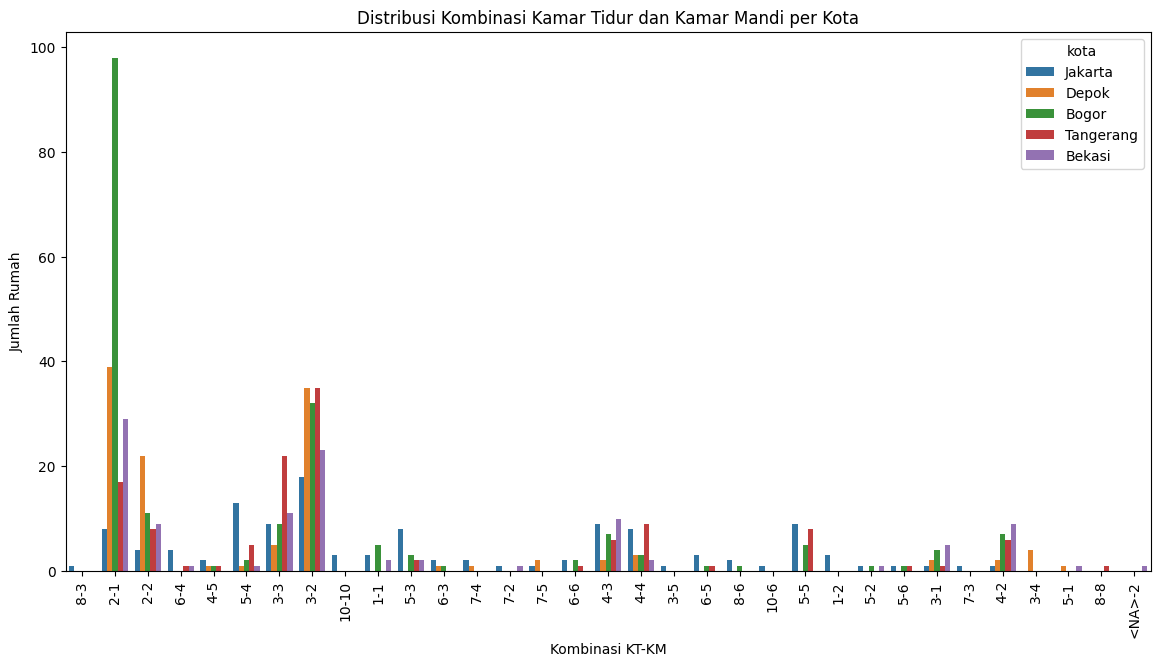

In [ ]:
# Identifikasi kombinasi KT dan KM yang tidak umum
kt_km_counts = df_all.groupby(['KT', 'KM']).size().reset_index(name='count').sort_values(by='count')
print("Kombinasi Kamar Tidur dan Kamar Mandi yang Jarang Muncul:")
display(kt_km_counts.head())

# Melihat distribusi kombinasi KT dan KM per kota
plt.figure(figsize=(14, 7))
sns.countplot(data=df_all, x=df_all['KT'].astype(str) + '-' + df_all['KM'].astype(str), hue='kota')
plt.title('Distribusi Kombinasi Kamar Tidur dan Kamar Mandi per Kota')
plt.xlabel('Kombinasi KT-KM')
plt.ylabel('Jumlah Rumah')
plt.xticks(rotation=90)
plt.show()

Berdasarkan hasil visualisasi distribusi kombinasi kamar tidur dan kamar mandi per kota, dapat dilihat bahwa di Bogor kombinasi 2 kamar tidur & 1 kamar mandi (2-1) mendominasi jumlah rumah yang dijual, sementara di kota lain seperti Jakarta, Depok, Tangerang, dan Bekasi pola distribusinya lebih beragam. Hal ini menunjukkan bahwa preferensi pasar di tiap kota bisa berbeda, misalnya Bogor lebih banyak menawarkan rumah sederhana dengan tipe 2-1, sedangkan kota besar seperti Jakarta dan Tangerang memiliki variasi kombinasi yang lebih luas, termasuk rumah dengan jumlah kamar tidur dan kamar mandi lebih banyak. Informasi ini penting bagi perusahaan karena dapat digunakan untuk mengidentifikasi niche market di setiap kota, sehingga RPPI dapat menyesuaikan strategi investasi dan pemasaran dengan karakteristik pasar lokal, serta menjadikan tipe rumah tertentu sebagai produk unggulan sesuai kebutuhan kota tersebut.